In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_train = pd.read_csv('/content/Training_Data_Set.csv')
data_test = pd.read_csv('/content/Test_Data_Set.csv')

In [ ]:
data_train.head()

ID   Maker    model   Location  Distance       Owner Type  \
0  11100001   skoda  octavia  Ahmedabad        NaN          Second   
1  11100002    fiat    panda  Ahmedabad    27750.0           Third   
2  11100003     bmw       x1  Hyderabad    46000.0           Third   
3  11100004  nissan     juke     Mumbai    43949.0           Third   
4  11100005     bmw       x5     Jaipur    59524.0  Fourth & Above   

   manufacture_year  Age of car  engine_displacement  engine_power body_type  \
0            1964.0          55                 1964         147.0   compact   
1            2012.0           7                 1242          51.0       NaN   
2            2014.0           5                 1995         105.0       NaN   
3            2011.0           8                 1618         140.0       NaN   
4            2012.0           7                 2993         180.0       NaN   

   Vroom Audit Rating transmission  door_count  seat_count fuel_type  \
0                   8          man         NaN         NaN    petrol   
1                   6          man         4.0         4.0    petrol   
2                   7         auto         4.0         5.0    diesel   
3                   7          man         4.0         5.0    petrol   
4                   7         auto         4.0         5.0    diesel   

        Price  
0   543764.25  
1   401819.25  
2  2392855.50  
3   958606.50  
4  3085561.50

In [ ]:
data_test.head()

ID  Maker    model    Location  Distance       Owner Type  \
0  21100001  skoda  octavia      Mumbai   150000.0           First   
1  21100002  skoda    rapid  Coimbatore    29376.0           Third   
2  21100003  skoda  octavia  Coimbatore    30563.0          Second   
3  21100004   audi       q3       Delhi     8650.0  Fourth & Above   
4  21100005   audi       tt     Chennai     6400.0           Third   

   manufacture_year  Age of car  engine_displacement  engine_power body_type  \
0              2007          12                 1595          75.0       NaN   
1              2014           5                 1598          77.0       NaN   
2              2014           5                 1968         110.0       NaN   
3              2015           4                 1968         110.0       NaN   
4              2015           4                 1984         169.0       NaN   

   Vroom Audit Rating transmission  door_count  seat_count fuel_type  
0                   5          man         4.0         5.0    petrol  
1                   4          man         4.0         5.0    diesel  
2                   5          man         5.0         5.0    diesel  
3                   8         auto         4.0         5.0    diesel  
4                   4         auto         2.0         NaN    petrol

Explore the data:

In [ ]:
data_train.sample().T

11902
ID                    11111903
Maker                    skoda
model                   citigo
Location               Chennai
Distance                8587.0
Owner Type               Third
manufacture_year        2014.0
Age of car                   5
engine_displacement        999
engine_power              44.0
body_type                  NaN
Vroom Audit Rating           5
transmission               man
door_count                 3.0
seat_count                 4.0
fuel_type               petrol
Price                544041.75

In [ ]:
data_test.sample().T

419
ID                    21100420
Maker                     audi
model                       q5
Location             Bangalore
Distance               52050.0
Owner Type               Third
manufacture_year          2011
Age of car                   8
engine_displacement       1968
engine_power             125.0
body_type                  NaN
Vroom Audit Rating           8
transmission              auto
door_count                 4.0
seat_count                 5.0
fuel_type               diesel

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53509 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53513 non-null  float64
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           45981 non-null  float64
 14  seat_count           45004 non-null  float64
 15  fuel_type            53515 non-null 

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5615 non-null   int64  
 1   Maker                5615 non-null   object 
 2   model                5615 non-null   object 
 3   Location             5615 non-null   object 
 4   Distance             5487 non-null   float64
 5   Owner Type           5615 non-null   object 
 6   manufacture_year     5615 non-null   int64  
 7   Age of car           5615 non-null   int64  
 8   engine_displacement  5615 non-null   int64  
 9   engine_power         5447 non-null   float64
 10  body_type            422 non-null    object 
 11  Vroom Audit Rating   5615 non-null   int64  
 12  transmission         5615 non-null   object 
 13  door_count           4809 non-null   float64
 14  seat_count           4724 non-null   float64
 15  fuel_type            5615 non-null   o

In [ ]:
data_train.describe().T

count          mean            std         min  \
ID                   53515.0  1.112676e+07   15448.594165  11100001.0   
Distance             52304.0  9.454626e+04  275561.716141         0.0   
manufacture_year     53513.0  2.010408e+03       4.650367      1934.0   
Age of car           53515.0  8.591890e+00       4.650322         3.0   
engine_displacement  53515.0  1.904049e+03    1496.564596        14.0   
engine_power         52076.0  1.004483e+02      45.330622        10.0   
Vroom Audit Rating   53515.0  5.998374e+00       1.418336         4.0   
door_count           45981.0  3.973011e+00       0.740659         1.0   
seat_count           45004.0  4.886099e+00       0.564332         1.0   
Price                53515.0  1.098084e+06  844156.530729         3.0   

                             25%          50%           75%          max  
ID                   11113379.50  11126758.00  1.114014e+07  11153515.00  
Distance                15490.00     65520.00  1.356410e+05   9899800.00  
manufacture_year         2008.00      2011.00  2.014000e+03      2016.00  
Age of car                  5.00         8.00  1.100000e+01        85.00  
engine_displacement      1395.00      1896.00  1.995000e+03     32000.00  
engine_power               73.00        91.00  1.250000e+02       896.00  
Vroom Audit Rating          5.00         6.00  7.000000e+00         8.00  
door_count                  4.00         4.00  4.000000e+00         6.00  
seat_count                  5.00         5.00  5.000000e+00         9.00  
Price                  505181.25    885455.25  1.477829e+06  22120775.25

In [ ]:
data_test.describe().T

count          mean            std         min  \
ID                   5615.0  2.110281e+07    1621.055212  21100001.0   
Distance             5487.0  9.589009e+04  308854.678665         0.0   
manufacture_year     5615.0  2.010488e+03       4.737177      1950.0   
Age of car           5615.0  8.512378e+00       4.737177         3.0   
engine_displacement  5615.0  1.875839e+03    1402.871783       100.0   
engine_power         5447.0  9.947457e+01      45.483800        10.0   
Vroom Audit Rating   5615.0  5.995370e+00       1.399010         4.0   
door_count           4809.0  3.978374e+00       0.723930         2.0   
seat_count           4724.0  4.884843e+00       0.556629         2.0   

                            25%         50%         75%         max  
ID                   21101404.5  21102808.0  21104211.5  21105615.0  
Distance                14410.0     64000.0    133849.0   9143000.0  
manufacture_year         2008.0      2012.0      2014.0      2016.0  
Age of car                  5.0         7.0        11.0        69.0  
engine_displacement      1390.0      1798.0      1984.0     32000.0  
engine_power               73.0        88.0       125.0       968.0  
Vroom Audit Rating          5.0         6.0         7.0         8.0  
door_count                  4.0         4.0         4.0         6.0  
seat_count                  5.0         5.0         5.0         7.0

Rows and columns and data types:

In [ ]:
data_train.shape

(53515, 17)

In [ ]:
data_train.dtypes

ID                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year       float64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
Price                  float64
dtype: object

In [ ]:
data_test.shape

(5615, 16)

In [ ]:
data_test.dtypes

ID                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
dtype: object

Null data:

In [ ]:
data_train.isnull().sum()

ID                         0
Maker                      0
model                      0
Location                   6
Distance                1211
Owner Type                 0
manufacture_year           2
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count              7534
seat_count              8511
fuel_type                  0
Price                      0
dtype: int64

<Axes: >

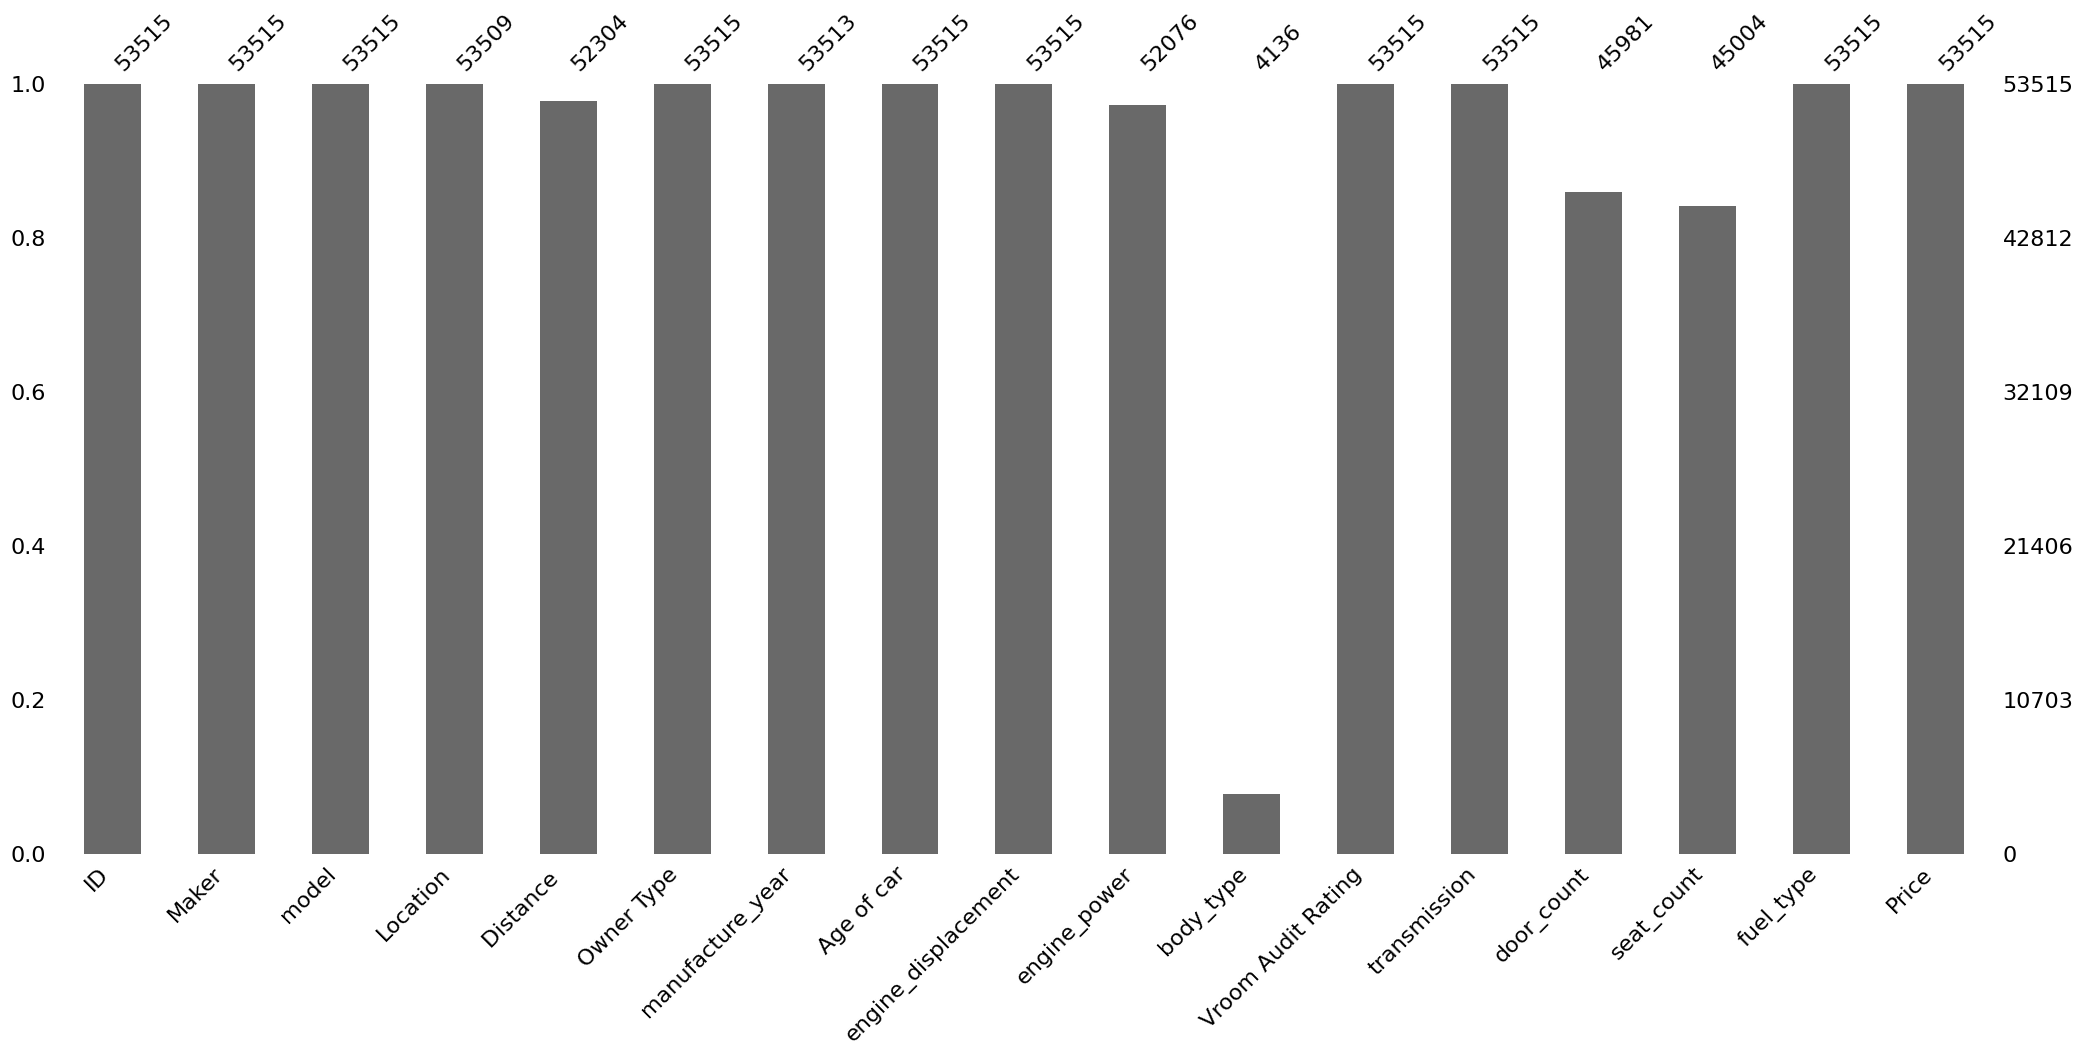

In [ ]:
!pip install missingno
import missingno as msno
msno.bar(data_train)

Observation:

1. Null values are present in location, distance, manufacture_year, engine_power, body_type, door_count and seat_count.
2. Price does not have any null value count so we can proceed with the analysis.

In [ ]:
data_test.isnull().sum()

ID                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count              806
seat_count              891
fuel_type                 0
dtype: int64

<Axes: >

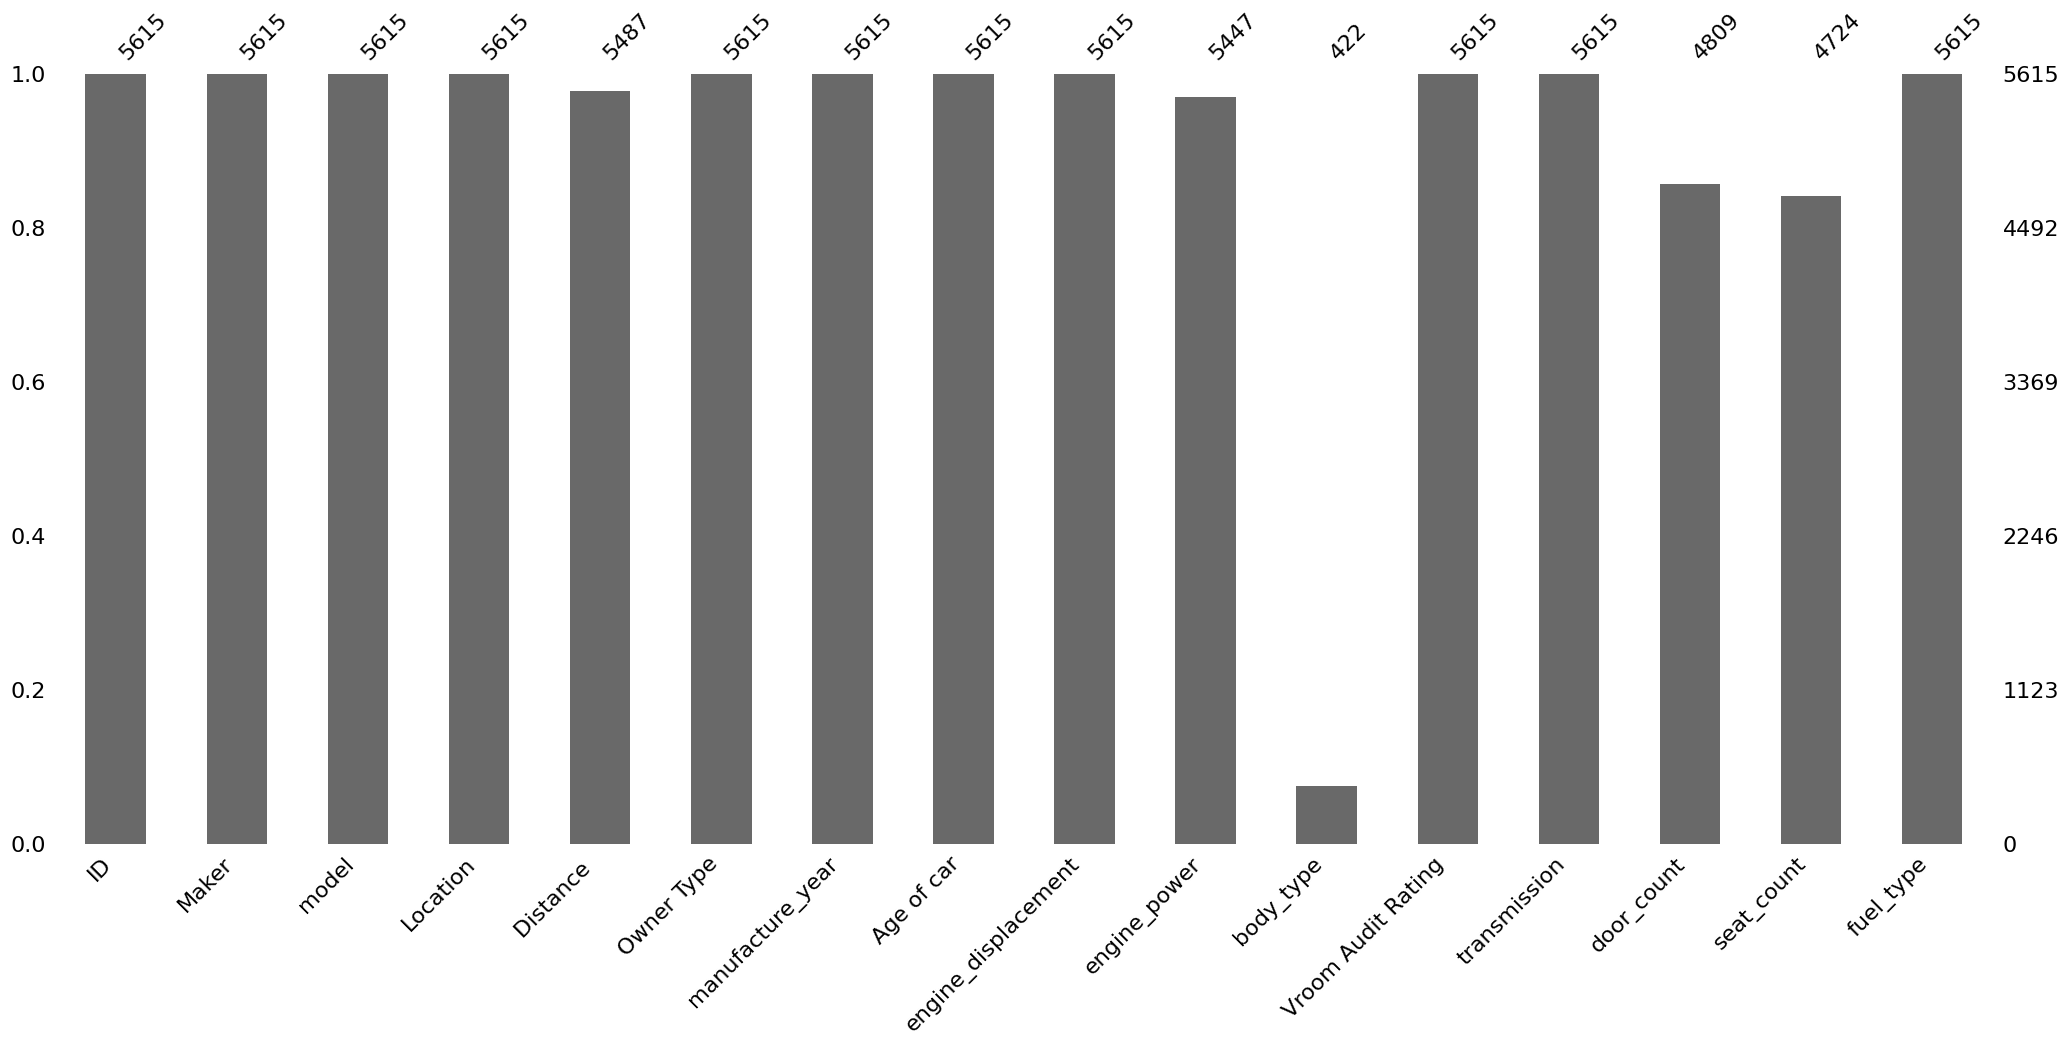

In [ ]:
msno.bar(data_test)

Null values are present in distance, engine_power, body_type, door_count and seat_count.

Feature engineering:

In [ ]:
data_train['Brand'] = data_train['Maker'].str.split().str[0].str.upper()

In [ ]:
data_train['Brand'].unique()

array(['SKODA', 'FIAT', 'BMW', 'NISSAN', 'AUDI', 'TOYOTA', 'HYUNDAI',
       'MASERATI'], dtype=object)

In [ ]:
data_train[data_train['Brand'].isin(['SKODA','FIAT','BMW','NISSAN','AUDI','TOYOTA','HYUNDAI','MASERATI'])].sample().T

24818
ID                    11124819
Maker                   toyota
model                    yaris
Location                 Kochi
Distance               23500.0
Owner Type              Second
manufacture_year        2014.0
Age of car                   5
engine_displacement       1497
engine_power              55.0
body_type                  NaN
Vroom Audit Rating           5
transmission              auto
door_count                 4.0
seat_count                 5.0
fuel_type               petrol
Price                1005672.0
Brand                   TOYOTA

Through this we can see that further development is required for Skoda, BMW, NISSAN, Audi, Toyota, Hyundai and Maserati.

In [ ]:
data_test['Brand'] = data_test['Maker'].str.split().str[0].str.upper()

In [ ]:
data_test['Brand'].unique()

array(['SKODA', 'AUDI', 'BMW', 'TOYOTA', 'NISSAN', 'FIAT', 'HYUNDAI',
       'MASERATI'], dtype=object)

In [ ]:
data_test[data_test['Brand'].isin(['SKODA','FIAT','BMW','NISSAN','AUDI','TOYOTA','HYUNDAI','MASERATI'])].sample().T

178
ID                   21100179
Maker                 hyundai
model                     i30
Location              Kolkata
Distance                 40.0
Owner Type             Second
manufacture_year         2015
Age of car                  4
engine_displacement      1582
engine_power             81.0
body_type                 NaN
Vroom Audit Rating          7
transmission              man
door_count                4.0
seat_count                5.0
fuel_type              diesel
Brand                 HYUNDAI

In the test data car that requires some development are FIAT, BMW, NISSAN, AUDI, TOYOTA, HYUNDAI and MASERATI.

List of categorical variables:

In [ ]:
cat_col = [
    "fuel_type",
    "Location",
    "transmission",
    "seat_count",
    "manufacture_year",
    "Owner Type",

]

for column in cat_col:
    print(data_train[column].value_counts())
    print("#" * 40)

fuel_type
diesel    27559
petrol    25956
Name: count, dtype: int64
########################################
Location
Coimbatore    4974
Kochi         4969
Bangalore     4877
Jaipur        4870
Kolkata       4867
Pune          4862
Mumbai        4860
Chennai       4834
Delhi         4822
Hyderabad     4804
Ahmedabad     4770
Name: count, dtype: int64
########################################
transmission
man     36734
auto    16781
Name: count, dtype: int64
########################################
seat_count
5.0    38824
4.0     4467
7.0      852
2.0      725
3.0      109
6.0       23
9.0        2
1.0        1
8.0        1
Name: count, dtype: int64
########################################
manufacture_year
2015.0    12386
2012.0     6250
2011.0     4939
2014.0     4877
2010.0     3778
2009.0     2914
2013.0     2910
2008.0     2859
2007.0     2840
2006.0     2018
2005.0     1705
2004.0     1341
2003.0      945
2001.0      751
2002.0      743
2000.0      727
1999.0      540
1998.0      31

Diesel cars are used more than the petrol cars.

Coimbatore has the highest number of car which are available for purchase.

Increased number of manually transmissioned car are ready to be purchased.

Most of cars are 5 seaters and first owned.

In [ ]:
cat_col = [
    "fuel_type",
    "Location",
    "transmission",
    "seat_count",
    "manufacture_year",
    "Owner Type",

]

for column in cat_col:
    print(data_test[column].value_counts())
    print("#" * 40)

fuel_type
diesel    2883
petrol    2732
Name: count, dtype: int64
########################################
Location
Kochi         538
Bangalore     532
Ahmedabad     528
Delhi         517
Hyderabad     516
Kolkata       516
Mumbai        515
Coimbatore    497
Jaipur        492
Chennai       490
Pune          474
Name: count, dtype: int64
########################################
transmission
man     3893
auto    1722
Name: count, dtype: int64
########################################
seat_count
5.0    4100
4.0     455
7.0      82
2.0      79
3.0       8
Name: count, dtype: int64
########################################
manufacture_year
2015    1366
2012     661
2014     548
2011     484
2010     388
2013     298
2008     293
2009     272
2007     260
2006     233
2005     171
2004     134
2003      93
2001      90
2002      85
2000      72
1999      65
1998      31
2016      22
1997      16
1996       7
1994       5
1991       4
1993       4
1995       2
1960       2
1990       2
1992   

In test data the Kochi has the highest number of cars for purchase.

Generate Brand Class:

In [ ]:
data_train.groupby(['Brand'])['Price'].agg({'median','mean','max'}).sort_values(by='max', ascending = False)

max          mean      median
Brand                                          
BMW       22120775.25  1.804843e+06  1635708.00
SKODA     12755662.50  7.993109e+05   697524.75
AUDI      10503108.75  2.123176e+06  2018544.75
TOYOTA     7501471.50  6.841427e+05   633411.00
FIAT       3743607.75  4.333561e+05   404475.75
MASERATI   2692147.50  2.039815e+06  2137816.50
NISSAN     2283714.00  9.221584e+05   930888.00
HYUNDAI    1785990.75  7.678909e+05   756065.25

In [ ]:
import numpy as np
import pandas as pd

# Assuming data_test is your DataFrame
# 1. Identify the numeric columns that you want to aggregate
#    For example:
numeric_cols = data_test.select_dtypes(include=np.number).columns

# 2. Convert 'Brand' to numeric if it's not:
data_test['Brand'] = pd.to_numeric(data_test['Brand'], errors='coerce')  # Replace 'coerce' with 'raise' if you want errors

In [ ]:
import numpy as np
import pandas as pd

# 1. Identify the numeric columns that you want to aggregate
numeric_cols = data_test.select_dtypes(include=np.number).columns

# 2. Include 'Price' in numeric_cols if it exists and is numeric
if 'Price' in data_test.columns and data_test['Price'].dtype in (np.number, int, float):
    numeric_cols = numeric_cols.insert(len(numeric_cols), 'Price')  # Add 'Price' to the end

# 3. Group by 'Brand' and aggregate
aggregated_data = data_test.groupby(['Brand'])[numeric_cols].agg(['median', 'mean', 'max'])

# 4. Flatten the multi-level column index (optional, for easier access)
aggregated_data.columns = ['_'.join(col) for col in aggregated_data.columns]

# 5. Sort by the maximum value of 'Price' column
# Check if 'Price_max' exists, otherwise sort by another relevant column
sort_column = 'Price_max' if 'Price_max' in aggregated_data.columns else aggregated_data.columns[-1]
# Default to last column if 'Price_max' not found
sorted_data = aggregated_data.sort_values(by=sort_column, ascending=False)

# Display the sorted data
print(sorted_data)

Empty DataFrame
Columns: [ID_median, ID_mean, ID_max, Distance _median, Distance _mean, Distance _max, manufacture_year_median, manufacture_year_mean, manufacture_year_max, Age of car_median, Age of car_mean, Age of car_max, engine_displacement_median, engine_displacement_mean, engine_displacement_max, engine_power_median, engine_power_mean, engine_power_max, Vroom Audit Rating_median, Vroom Audit Rating_mean, Vroom Audit Rating_max, door_count_median, door_count_mean, door_count_max, seat_count_median, seat_count_mean, seat_count_max, Brand_median, Brand_mean, Brand_max]
Index: []

[0 rows x 30 columns]


Feature analysis:

Categorical variables:

In [ ]:
maker_count = data_train['Maker'].value_counts(dropna = False)
maker_count

Maker
skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: count, dtype: int64

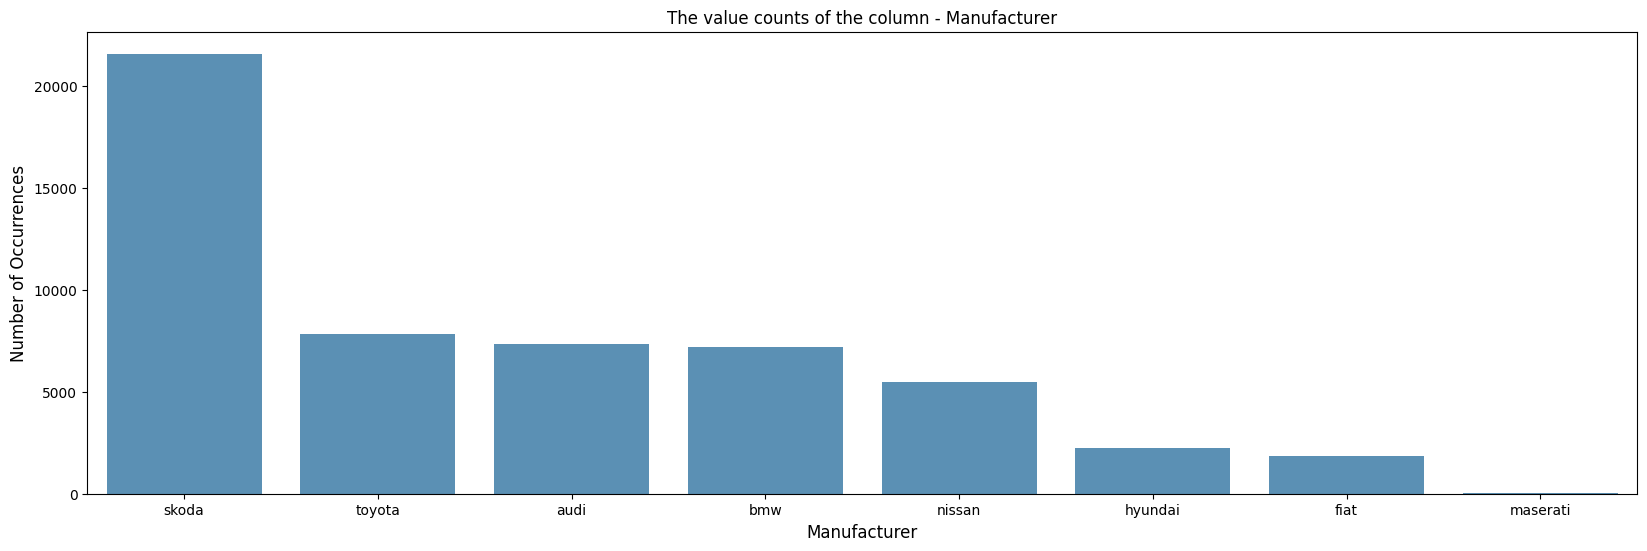

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 6))
# Call sns.barplot with x and y as keyword arguments
sns.barplot(x=maker_count.index, y=maker_count.values, alpha = 0.8)
plt.title('The value counts of the column - Manufacturer')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Manufacturer', fontsize = 12)
plt.show()

We can see that the makers are not uniformly distributed.

In [ ]:
manufacture_count = data_test['Maker'].value_counts(dropna = False)
manufacture_count

Maker
skoda       2251
toyota       851
audi         747
bmw          704
nissan       597
hyundai      260
fiat         200
maserati       5
Name: count, dtype: int64

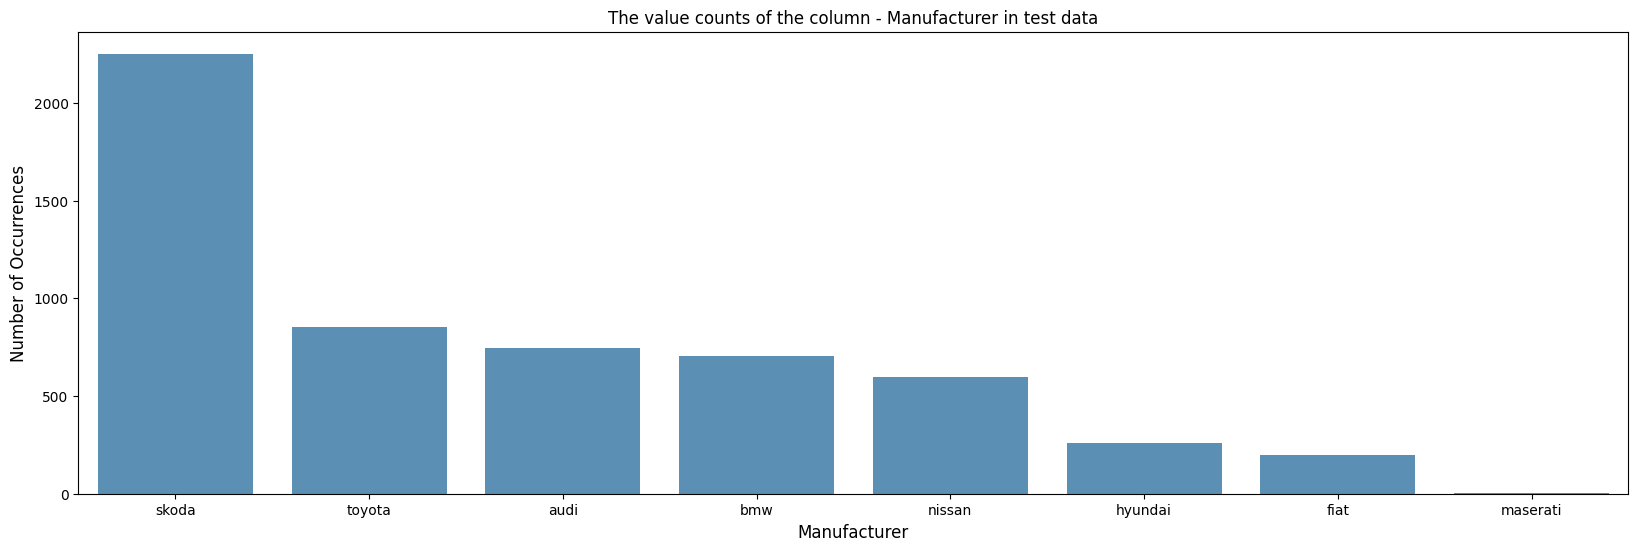

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 6))
# Call sns.barplot with x and y as keyword arguments
sns.barplot(x=manufacture_count.index, y=manufacture_count.values, alpha = 0.8)
plt.title('The value counts of the column - Manufacturer in test data')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Manufacturer', fontsize = 12)
plt.show()

Skoda manufacturers are more than any other manufacturers.

In [ ]:
mean_price_maker = data_train[['Maker', 'Price']].groupby('Maker', as_index = False).mean()
mean_price_maker

Maker         Price
0      audi  2.123176e+06
1       bmw  1.804843e+06
2      fiat  4.333561e+05
3   hyundai  7.678909e+05
4  maserati  2.039815e+06
5    nissan  9.221584e+05
6     skoda  7.993109e+05
7    toyota  6.841427e+05

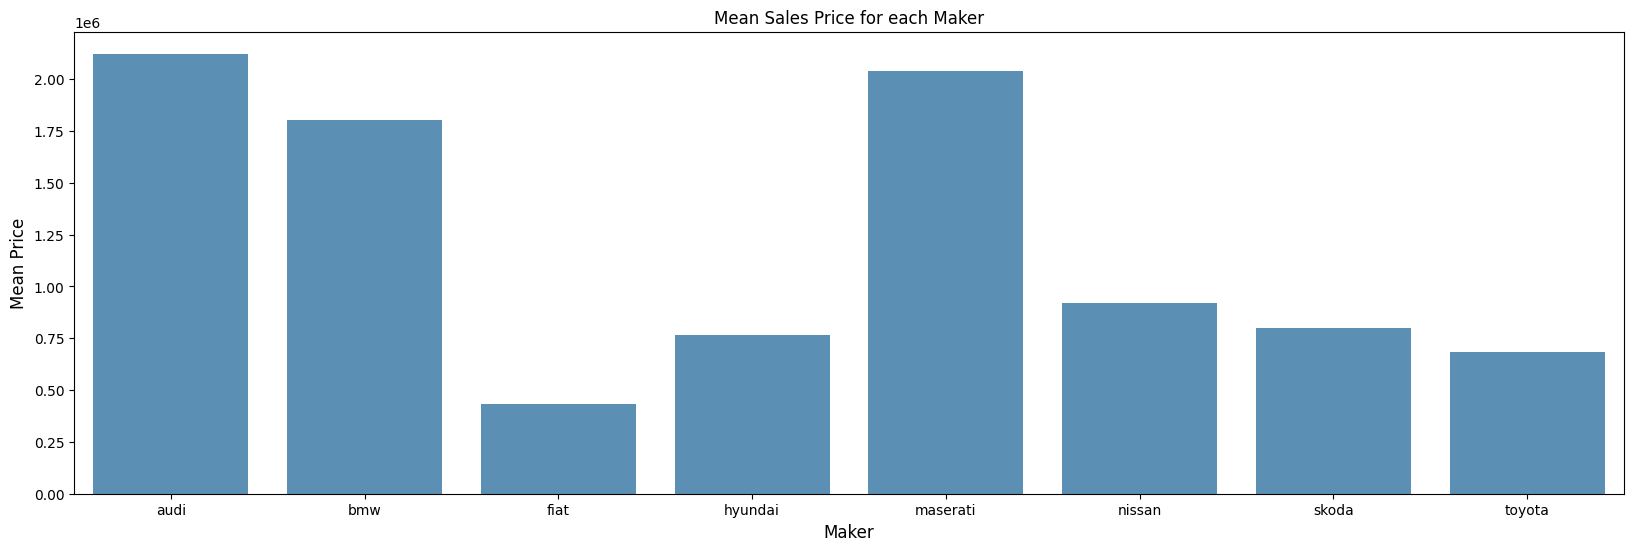

In [ ]:
plt.figure(figsize = (20, 6))
# Call sns.barplot with x and y as keyword arguments
sns.barplot(x=mean_price_maker['Maker'], y=mean_price_maker['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Maker')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Maker', fontsize = 12)
plt.show()

There is no column of price in the test dataset which can used for the analysis of the test dataset. Here I am performing the same function for both train and test dataset for better understanding.

Vehicle Type:

In [ ]:
vehicle_count = data_train['model'].value_counts(dropna = False)
vehicle_count

model
octavia     12619
superb       3195
yaris        3176
qashqai      2854
x3           2779
x1           2420
i30          2047
q5           2039
x5           1979
yeti         1898
panda        1769
q3           1736
coupe        1710
micra        1676
auris        1666
avensis      1512
aygo         1486
rapid        1409
roomster     1322
q7           1245
citigo       1120
juke          955
tt            903
Name: count, dtype: int64

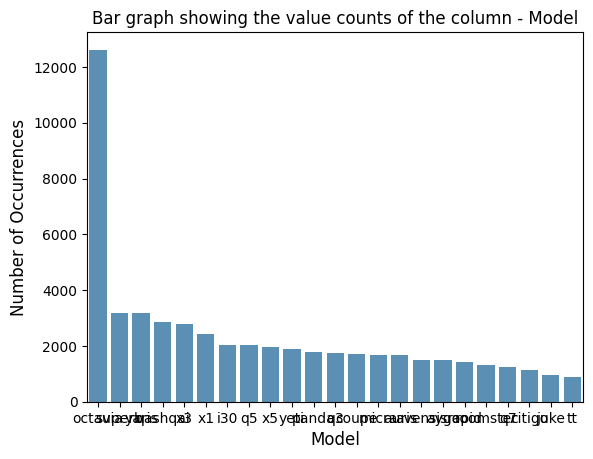

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pass the data as named arguments to the barplot() function
sns.barplot(x=vehicle_count.index, y=vehicle_count.values, alpha=0.8)

plt.title('Bar graph showing the value counts of the column - Model')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

In [ ]:
vehicle_type_count = data_test['model'].value_counts(dropna = False)
vehicle_type_count

model
octavia     1333
yaris        341
superb       341
qashqai      301
x3           282
x1           240
i30          229
q5           209
micra        195
panda        195
avensis      185
x5           182
yeti         180
q3           179
auris        176
coupe        174
rapid        159
aygo         149
roomster     140
q7           123
tt           103
juke         101
citigo        98
Name: count, dtype: int64

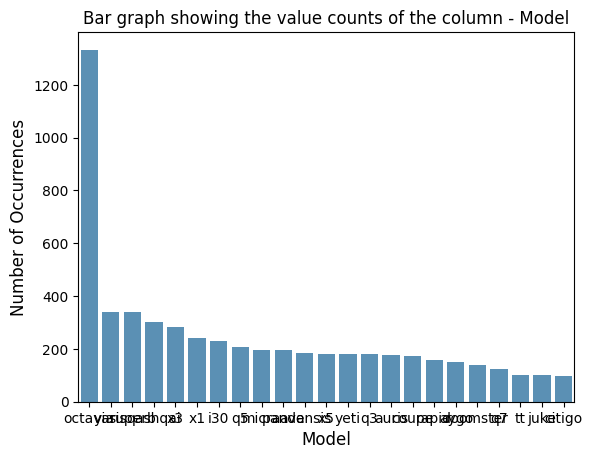

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pass the data as named arguments to the barplot() function
sns.barplot(x=vehicle_type_count.index, y=vehicle_type_count.values, alpha=0.8)

plt.title('Bar graph showing the value counts of the column - Model')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

For both the train and test dataset the model distribution is approximately same.

In [ ]:
mean_price_vehicle = data_train[['model', 'Price']].groupby('model', as_index = False).mean()
mean_price_vehicle

model         Price
0      auris  1.007341e+06
1    avensis  6.939379e+05
2       aygo  5.217669e+05
3     citigo  6.040203e+05
4      coupe  1.606849e+06
5        i30  8.062681e+05
6       juke  1.016066e+06
7      micra  3.733901e+05
8    octavia  6.936200e+05
9      panda  4.317296e+05
10        q3  2.108287e+06
11        q5  2.217625e+06
12        q7  2.700675e+06
13   qashqai  1.212997e+06
14     rapid  9.339825e+05
15  roomster  5.432577e+05
16    superb  1.122929e+06
17        tt  1.600868e+06
18        x1  1.627981e+06
19        x3  1.837825e+06
20        x5  1.974800e+06
21     yaris  5.859161e+05
22      yeti  1.150855e+06

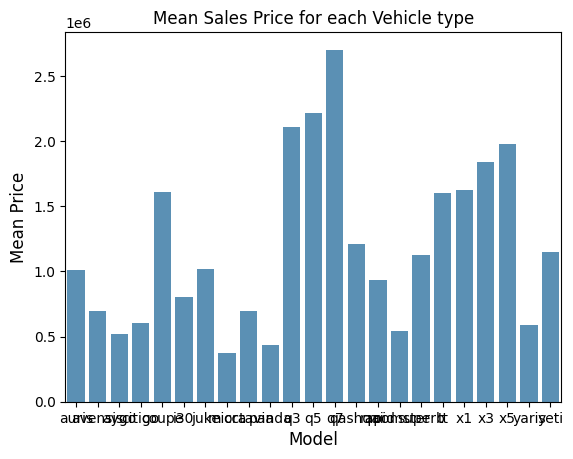

In [ ]:
sns.barplot(x=mean_price_vehicle['model'], y=mean_price_vehicle['Price'], alpha = 0.8) # Pass the x and y arguments as named parameters to barplot
plt.title('Mean Sales Price for each Vehicle type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Model', fontsize = 12)
plt.show()

Numerical Variable:

Price:

Text(0.5, 1.0, 'Distribution of the column - Price')

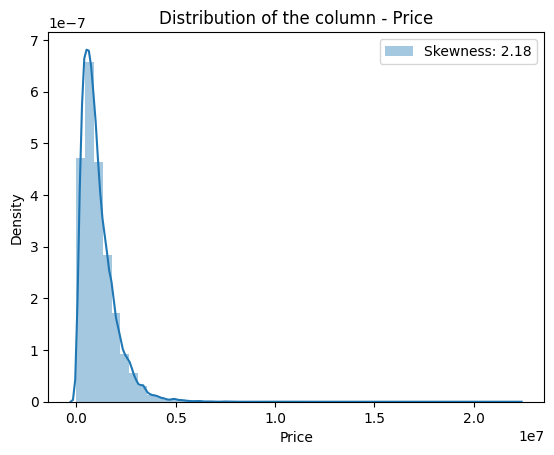

In [ ]:
sns.distplot(data_train['Price'], label = 'Skewness: %.2f'%(data_train['Price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price')

The generated distplot and the skewness value provide insights into the distribution of car prices. This plot is right skewed means positive distribution.

The skewness value quantifies the asymmetry of the distribution. A positive skewness indicates that the distribution has a longer tail on the right side, meaning there are more cars with higher prices. A negative skewness implies a longer tail on the left side, indicating more cars with lower prices.

Engine power:

Text(0.5, 1.0, 'Distribution of the column - engine_power')

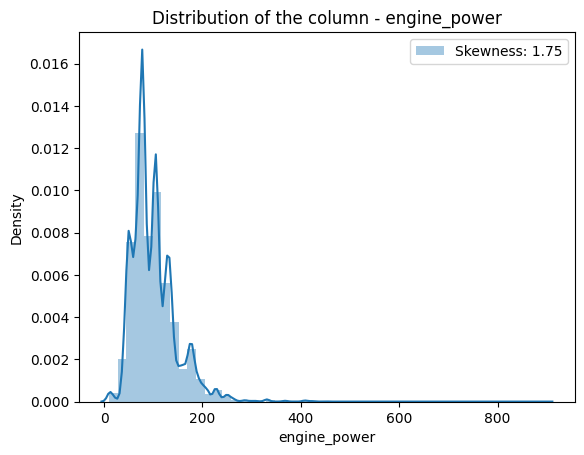

In [ ]:
sns.distplot(data_train['engine_power'], label = 'Skewness: %.2f'%(data_train['engine_power'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - engine_power')

Seat count:

Text(0.5, 1.0, 'Distribution of the column - Seat count')

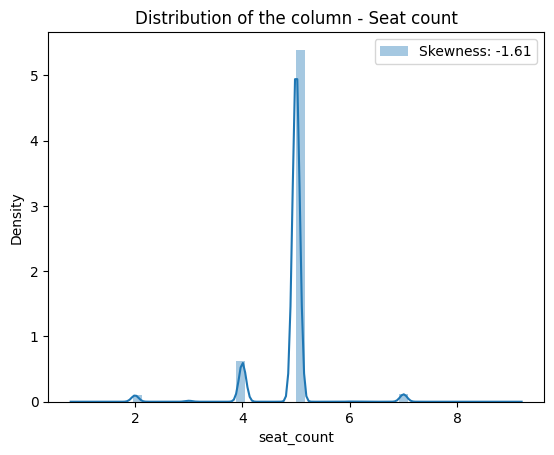

In [ ]:
sns.distplot(data_train['seat_count'], label = 'Skewness: %.2f'%(data_train['seat_count'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Seat count')

Text(0.5, 1.0, 'Distribution of the column in test - Seat count')

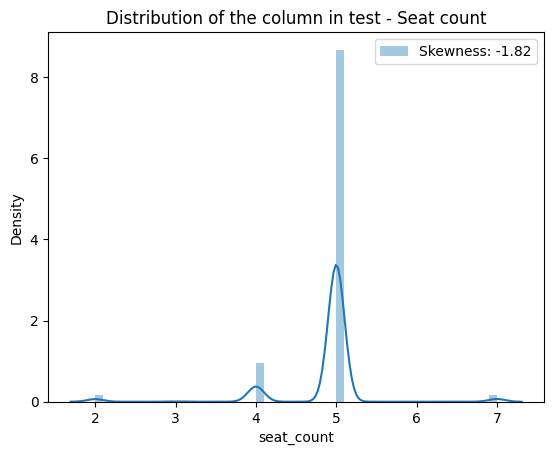

In [ ]:
sns.distplot(data_test['seat_count'], label = 'Skewness: %.2f'%(data_test['seat_count'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column in test - Seat count')

In [ ]:
!pip install collections # Install if collections module isn't there. Usually its pre-installed.
from collections import Counter # import Counter from collections module

def detect_outliers(data_train, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(data_train[feature], 25)
        Q3 = np.percentile(data_train[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = data_train[(data_train[feature] < Q1 - outlier_step) | (data_train[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices) # Now Counter is defined and will work correctly.
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(data_train, 2, ['Price', 'manufacture_year', 'Age of car',
                                               'engine_power', 'seat_count', 'door_count'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
We will drop these 0 indices:  []


In [ ]:
!pip install collections # Install if collections module isn't there. Usually it's pre-installed.
from collections import Counter # import Counter from collections module
import numpy as np # Import numpy for numerical operations


def detect_outliers(data, n, features_list):
    """
    Detects outliers in a DataFrame based on specified features.

    Args:
        data: The DataFrame to check for outliers.
        n: The minimum number of features in which a data point must be an outlier to be considered.
        features_list: A list of feature names to consider for outlier detection.

    Returns:
        A list of indices corresponding to data points identified as outliers.
    """
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        # Corrected line: Use 'data' instead of 'data_train' for indexing
        outlier_list_col = data[(data[feature] < Q1 - outlier_step) | (data[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices) # Now Counter is defined and will work correctly.
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

# Applying to data_train
outliers_to_drop_train = detect_outliers(data_train, 2, ['Price', 'manufacture_year', 'Age of car',
                                                        'engine_power', 'seat_count', 'door_count'])
print("We will drop these {} indices from data_train: ".format(len(outliers_to_drop_train)), outliers_to_drop_train)

# Applying to data_test
outliers_to_drop_test = detect_outliers(data_test, 2, ['manufacture_year', 'Age of car',
                                                       'engine_power', 'seat_count', 'door_count'])
print("We will drop these {} indices from data_test: ".format(len(outliers_to_drop_test)), outliers_to_drop_test)

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
We will drop these 0 indices from data_train:  []
We will drop these 0 indices from data_test:  []


Drop and fill missing values:

In [ ]:
modified_data_train = data_train[data_train['Price'].notna()]
modified_data_train

ID   Maker    model   Location  Distance       Owner Type  \
0      11100001   skoda  octavia  Ahmedabad        NaN          Second   
1      11100002    fiat    panda  Ahmedabad    27750.0           Third   
2      11100003     bmw       x1  Hyderabad    46000.0           Third   
3      11100004  nissan     juke     Mumbai    43949.0           Third   
4      11100005     bmw       x5     Jaipur    59524.0  Fourth & Above   
...         ...     ...      ...        ...        ...             ...   
53510  11153511   skoda  octavia      Delhi    29334.0  Fourth & Above   
53511  11153512   skoda  octavia  Bangalore   223631.0  Fourth & Above   
53512  11153513     bmw       x1       Pune    25500.0           Third   
53513  11153514  toyota  avensis     Jaipur  1195500.0           Third   
53514  11153515     bmw       x5      Kochi   142000.0           First   

       manufacture_year  Age of car  engine_displacement  engine_power  \
0                1964.0          55                 1964         147.0   
1                2012.0           7                 1242          51.0   
2                2014.0           5                 1995         105.0   
3                2011.0           8                 1618         140.0   
4                2012.0           7                 2993         180.0   
...                 ...         ...                  ...           ...   
53510            2014.0           5                 1598          77.0   
53511            2009.0          10                 1900          77.0   
53512            2015.0           4                 1995         105.0   
53513            2011.0           8                11950          93.0   
53514            2008.0          11                 2993         173.0   

      body_type  Vroom Audit Rating transmission  door_count  seat_count  \
0       compact                   8          man         NaN         NaN   
1           NaN                   6          man         4.0         4.0   
2           NaN                   7         auto         4.0         5.0   
3           NaN                   7          man         4.0         5.0   
4           NaN                   7         auto         4.0         5.0   
...         ...                 ...          ...         ...         ...   
53510       NaN                   4          man         4.0         5.0   
53511       NaN                   8          man         5.0         5.0   
53512       NaN                   4         auto         4.0         5.0   
53513   compact                   5          man         NaN         NaN   
53514       NaN                   4         auto         5.0         5.0   

      fuel_type       Price   Brand  
0        petrol   543764.25   SKODA  
1        petrol   401819.25    FIAT  
2        diesel  2392855.50     BMW  
3        petrol   958606.50  NISSAN  
4        diesel  3085561.50     BMW  
...         ...         ...     ...  
53510    diesel  1342996.50   SKODA  
53511    diesel   510732.75   SKODA  
53512    diesel  2008123.50     BMW  
53513    diesel   874352.25  TOYOTA  
53514    diesel  1576610.25     BMW  

[53515 rows x 18 columns]

In [ ]:
modified_data_train.isnull().sum().sort_values(ascending = False)

body_type              49379
seat_count              8511
door_count              7534
engine_power            1439
Distance                1211
Location                   6
manufacture_year           2
Vroom Audit Rating         0
Price                      0
fuel_type                  0
transmission               0
ID                         0
Maker                      0
engine_displacement        0
Age of car                 0
Owner Type                 0
model                      0
Brand                      0
dtype: int64

Body_type missing values:

In [ ]:
body_type_index = list(~modified_data_train['body_type'].isnull())
# Convert the 'body_type' column to a numerical representation before calculating the median.
# Assuming 'body_type' contains categorical values, you can factorize it:
body_type_numeric = pd.factorize(modified_data_train['body_type'].loc[body_type_index])[0]
median_year = np.median(body_type_numeric)
median_year

0.0

In [ ]:
modified_data_train['body_type'].fillna(median_year, inplace=True)

In [ ]:
modified_data_train['body_type'].isnull().sum()

0

Seat_count missing values:

In [ ]:
seat_count_index = list(~modified_data_train['seat_count'].isnull())
seat_count_numeric = pd.factorize(modified_data_train['seat_count'].loc[seat_count_index])[0]
median_year = np.median(seat_count_numeric)
median_year

1.0

In [ ]:
modified_data_train['seat_count'].fillna(median_year, inplace=True)

In [ ]:
modified_data_train['seat_count'].isnull().sum()

0

Door_count missing values:

In [ ]:
door_count_index = list(~modified_data_train['door_count'].isnull())
door_count_numeric = pd.factorize(modified_data_train['door_count'].loc[door_count_index])[0]
median_year = np.median(door_count_numeric)
median_year

0.0

In [ ]:
modified_data_train['door_count'].fillna(median_year, inplace=True)
modified_data_train['door_count'].isnull().sum()

0

Engine_power missing values:

In [ ]:
engine_power_index = list(~modified_data_train['engine_power'].isnull())
engine_power_numeric = pd.factorize(modified_data_train['engine_power'].loc[engine_power_index])[0]
median_year = np.median(engine_power_numeric)
median_year

16.0

In [ ]:
modified_data_train['engine_power'].fillna(median_year, inplace=True)
modified_data_train['engine_power'].isnull().sum()

0

Distance missing values:

In [ ]:
import pandas as pd
import numpy as np

# 1. Convert all column names to lowercase for easier comparison
modified_data_train.columns = modified_data_train.columns.str.lower()

# 2. Check if 'distance' (lowercase) exists in the columns
if 'distance' in modified_data_train.columns:
    # 3. Proceed with the original code, but using the lowercase column name and calculate median for 'distance'
    distance_index = list(~modified_data_train['distance'].isnull())
    distance_numeric = pd.factorize(modified_data_train['distance'].loc[distance_index])[0]
    median_distance = np.median(distance_numeric) # Calculate median for distance
    print(median_distance)

    # 4. Fill NaN values in 'distance' with the calculated median for 'distance'
    modified_data_train['distance'].fillna(median_distance, inplace=True)
    print(modified_data_train['distance'].isnull().sum())
else:
    # 5. If 'distance' is still not found, print a message to help with debugging
    print("Column 'distance' not found in DataFrame. Available columns:", modified_data_train.columns)

Column 'distance' not found in DataFrame. Available columns: Index(['id', 'maker', 'model', 'location', 'distance ', 'owner type',
       'manufacture_year', 'age of car', 'engine_displacement', 'engine_power',
       'body_type', 'vroom audit rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'price', 'brand'],
      dtype='object')


Manufacture_year missing values:

In [ ]:
manufacture_year_index = list(~modified_data_train['manufacture_year'].isnull())
manufacture_year_numeric = pd.factorize(modified_data_train['manufacture_year'].loc[manufacture_year_index])[0]
median_year = np.median(manufacture_year_numeric)
median_year

4.0

In [ ]:
modified_data_train['manufacture_year'].fillna(median_year, inplace=True)
modified_data_train['manufacture_year'].isnull().sum()

0

For test data:

In [ ]:
data_test.isnull().sum()

ID                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count              806
seat_count              891
fuel_type                 0
Brand                  5615
dtype: int64

In [ ]:
num_missing = data_test.isnull().sum(axis=1)
num_missing.value_counts()

2    4481
3     726
4     375
5      32
1       1
Name: count, dtype: int64

In [ ]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data_test[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Brand    1
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
body_type    4481
Brand        4481
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Distance          2
engine_power      1
body_type       456
door_count      399
seat_count      594
Brand           726
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Distance         97
engine_power    135
body_type       253
door_count      375
seat_count      265
Brand           375
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Distance        29
engine_power    32
body_type        3
door_count      32
seat_count      32
Brand           32
dtype: int64





In [ ]:
data_test[num_missing==7]

Empty DataFrame
Columns: [ID, Maker, model, Location, Distance , Owner Type, manufacture_year, Age of car, engine_displacement, engine_power, body_type, Vroom Audit Rating, transmission, door_count, seat_count, fuel_type, Brand]
Index: []

In [ ]:
df = data_test.copy()
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
body_type              0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Brand                  0
dtype: int64

Dropping unnecessary columns:

In [ ]:
print(modified_data_train.columns) # Print columns to see exact names

# Adjust the column names in the drop function based on the actual column names
# If the columns are named 'Id' and 'model', use the following:
modified_data_train = modified_data_train.drop(['Id','model'], axis=1, errors='ignore')

# The errors='ignore' will prevent an error if a column is not found,
# which can be helpful for debugging.

Index(['id', 'maker', 'model', 'location', 'distance ', 'owner type',
       'manufacture_year', 'age of car', 'engine_displacement', 'engine_power',
       'body_type', 'vroom audit rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'price', 'brand'],
      dtype='object')


In [ ]:
modified_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   53515 non-null  int64  
 1   maker                53515 non-null  object 
 2   location             53509 non-null  object 
 3   distance             52304 non-null  float64
 4   owner type           53515 non-null  object 
 5   manufacture_year     53515 non-null  float64
 6   age of car           53515 non-null  int64  
 7   engine_displacement  53515 non-null  int64  
 8   engine_power         53515 non-null  float64
 9   body_type            53515 non-null  object 
 10  vroom audit rating   53515 non-null  int64  
 11  transmission         53515 non-null  object 
 12  door_count           53515 non-null  float64
 13  seat_count           53515 non-null  float64
 14  fuel_type            53515 non-null  object 
 15  price                53515 non-null 

In [ ]:
data_test = data_test.drop(['ID','model'], axis=1)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5615 non-null   object 
 1   Location             5615 non-null   object 
 2   Distance             5487 non-null   float64
 3   Owner Type           5615 non-null   object 
 4   manufacture_year     5615 non-null   int64  
 5   Age of car           5615 non-null   int64  
 6   engine_displacement  5615 non-null   int64  
 7   engine_power         5447 non-null   float64
 8   body_type            422 non-null    object 
 9   Vroom Audit Rating   5615 non-null   int64  
 10  transmission         5615 non-null   object 
 11  door_count           4809 non-null   float64
 12  seat_count           4724 non-null   float64
 13  fuel_type            5615 non-null   object 
 14  Brand                0 non-null      float64
dtypes: float64(5), int64(4), object(6)
mem

In [ ]:
print(df.columns)
df = df.drop(['Id','model'], axis=1, errors='ignore')

Index(['ID', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Brand'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5615 non-null   int64  
 1   Maker                5615 non-null   object 
 2   Location             5615 non-null   object 
 3   Distance             5615 non-null   float64
 4   Owner Type           5615 non-null   object 
 5   manufacture_year     5615 non-null   int64  
 6   Age of car           5615 non-null   int64  
 7   engine_displacement  5615 non-null   int64  
 8   engine_power         5615 non-null   float64
 9   body_type            5615 non-null   object 
 10  Vroom Audit Rating   5615 non-null   int64  
 11  transmission         5615 non-null   object 
 12  door_count           5615 non-null   float64
 13  seat_count           5615 non-null   float64
 14  fuel_type            5615 non-null   object 
 15  Brand                5615 non-null   f

Price distribution petrol and disel car:

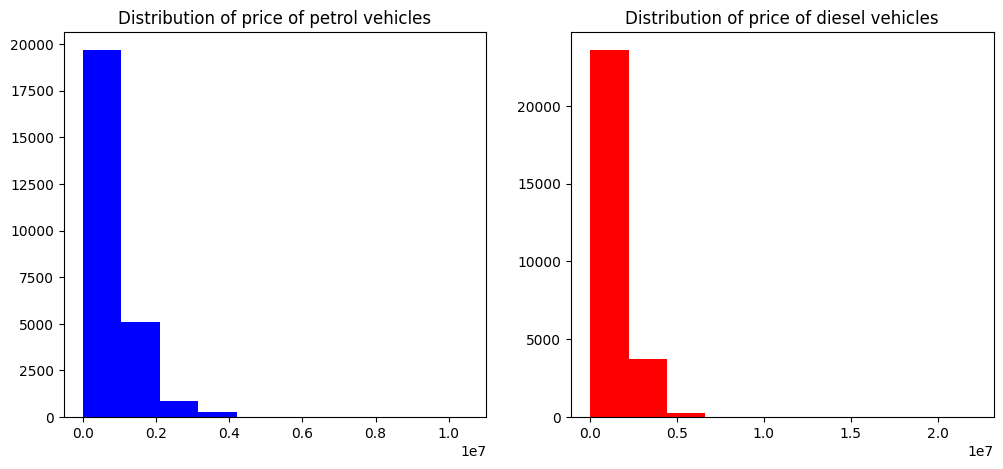

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (Your previous code) ...

# 1. Check and clean column names:
modified_data_train.columns = modified_data_train.columns.str.strip()  # Remove leading/trailing spaces
modified_data_train.columns = modified_data_train.columns.str.replace('\s+', '_', regex=True) # Replace spaces with underscores

# 2. Verify and convert 'Price' data type:
if not pd.api.types.is_numeric_dtype(modified_data_train['price']):
    modified_data_train['price'] = pd.to_numeric(modified_data_train['price'], errors='coerce')

# 3. Remove missing or invalid values:
modified_data_train = modified_data_train.dropna(subset=['price'])
modified_data_train = modified_data_train[np.isfinite(modified_data_train['price'])]

# 4. Proceed with plotting using Matplotlib:
f = plt.figure(figsize=(12, 5))

petrol_data = modified_data_train[modified_data_train['fuel_type'] == 'petrol']
diesel_data = modified_data_train[modified_data_train['fuel_type'] == 'diesel']

ax = f.add_subplot(121)
ax.hist(petrol_data['price'], color='b')  # Use Matplotlib's hist function
ax.set_title('Distribution of price of petrol vehicles')

ax = f.add_subplot(122)
ax.hist(diesel_data['price'], color='r')  # Use Matplotlib's hist function
ax.set_title('Distribution of price of diesel vehicles')

plt.show()

Both the graphs are right skewed showing the positive distribution.

<Axes: xlabel='fuel_type', ylabel='price'>

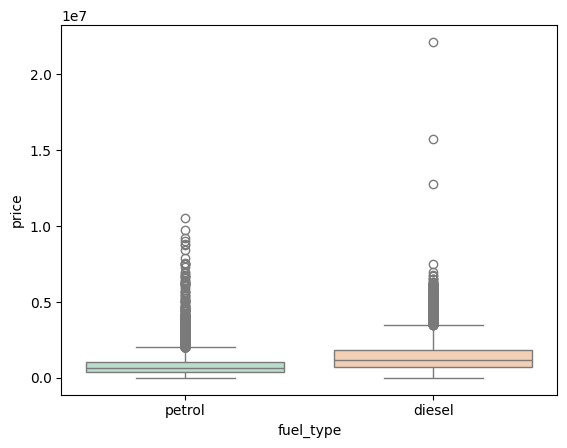

In [ ]:
sns.boxplot(x='fuel_type', y='price', data=modified_data_train, palette='Pastel2')

The price of diesel vehicle is higher than the petrol vehicle. There are outliers present in both in petrol and diesel vehicles.

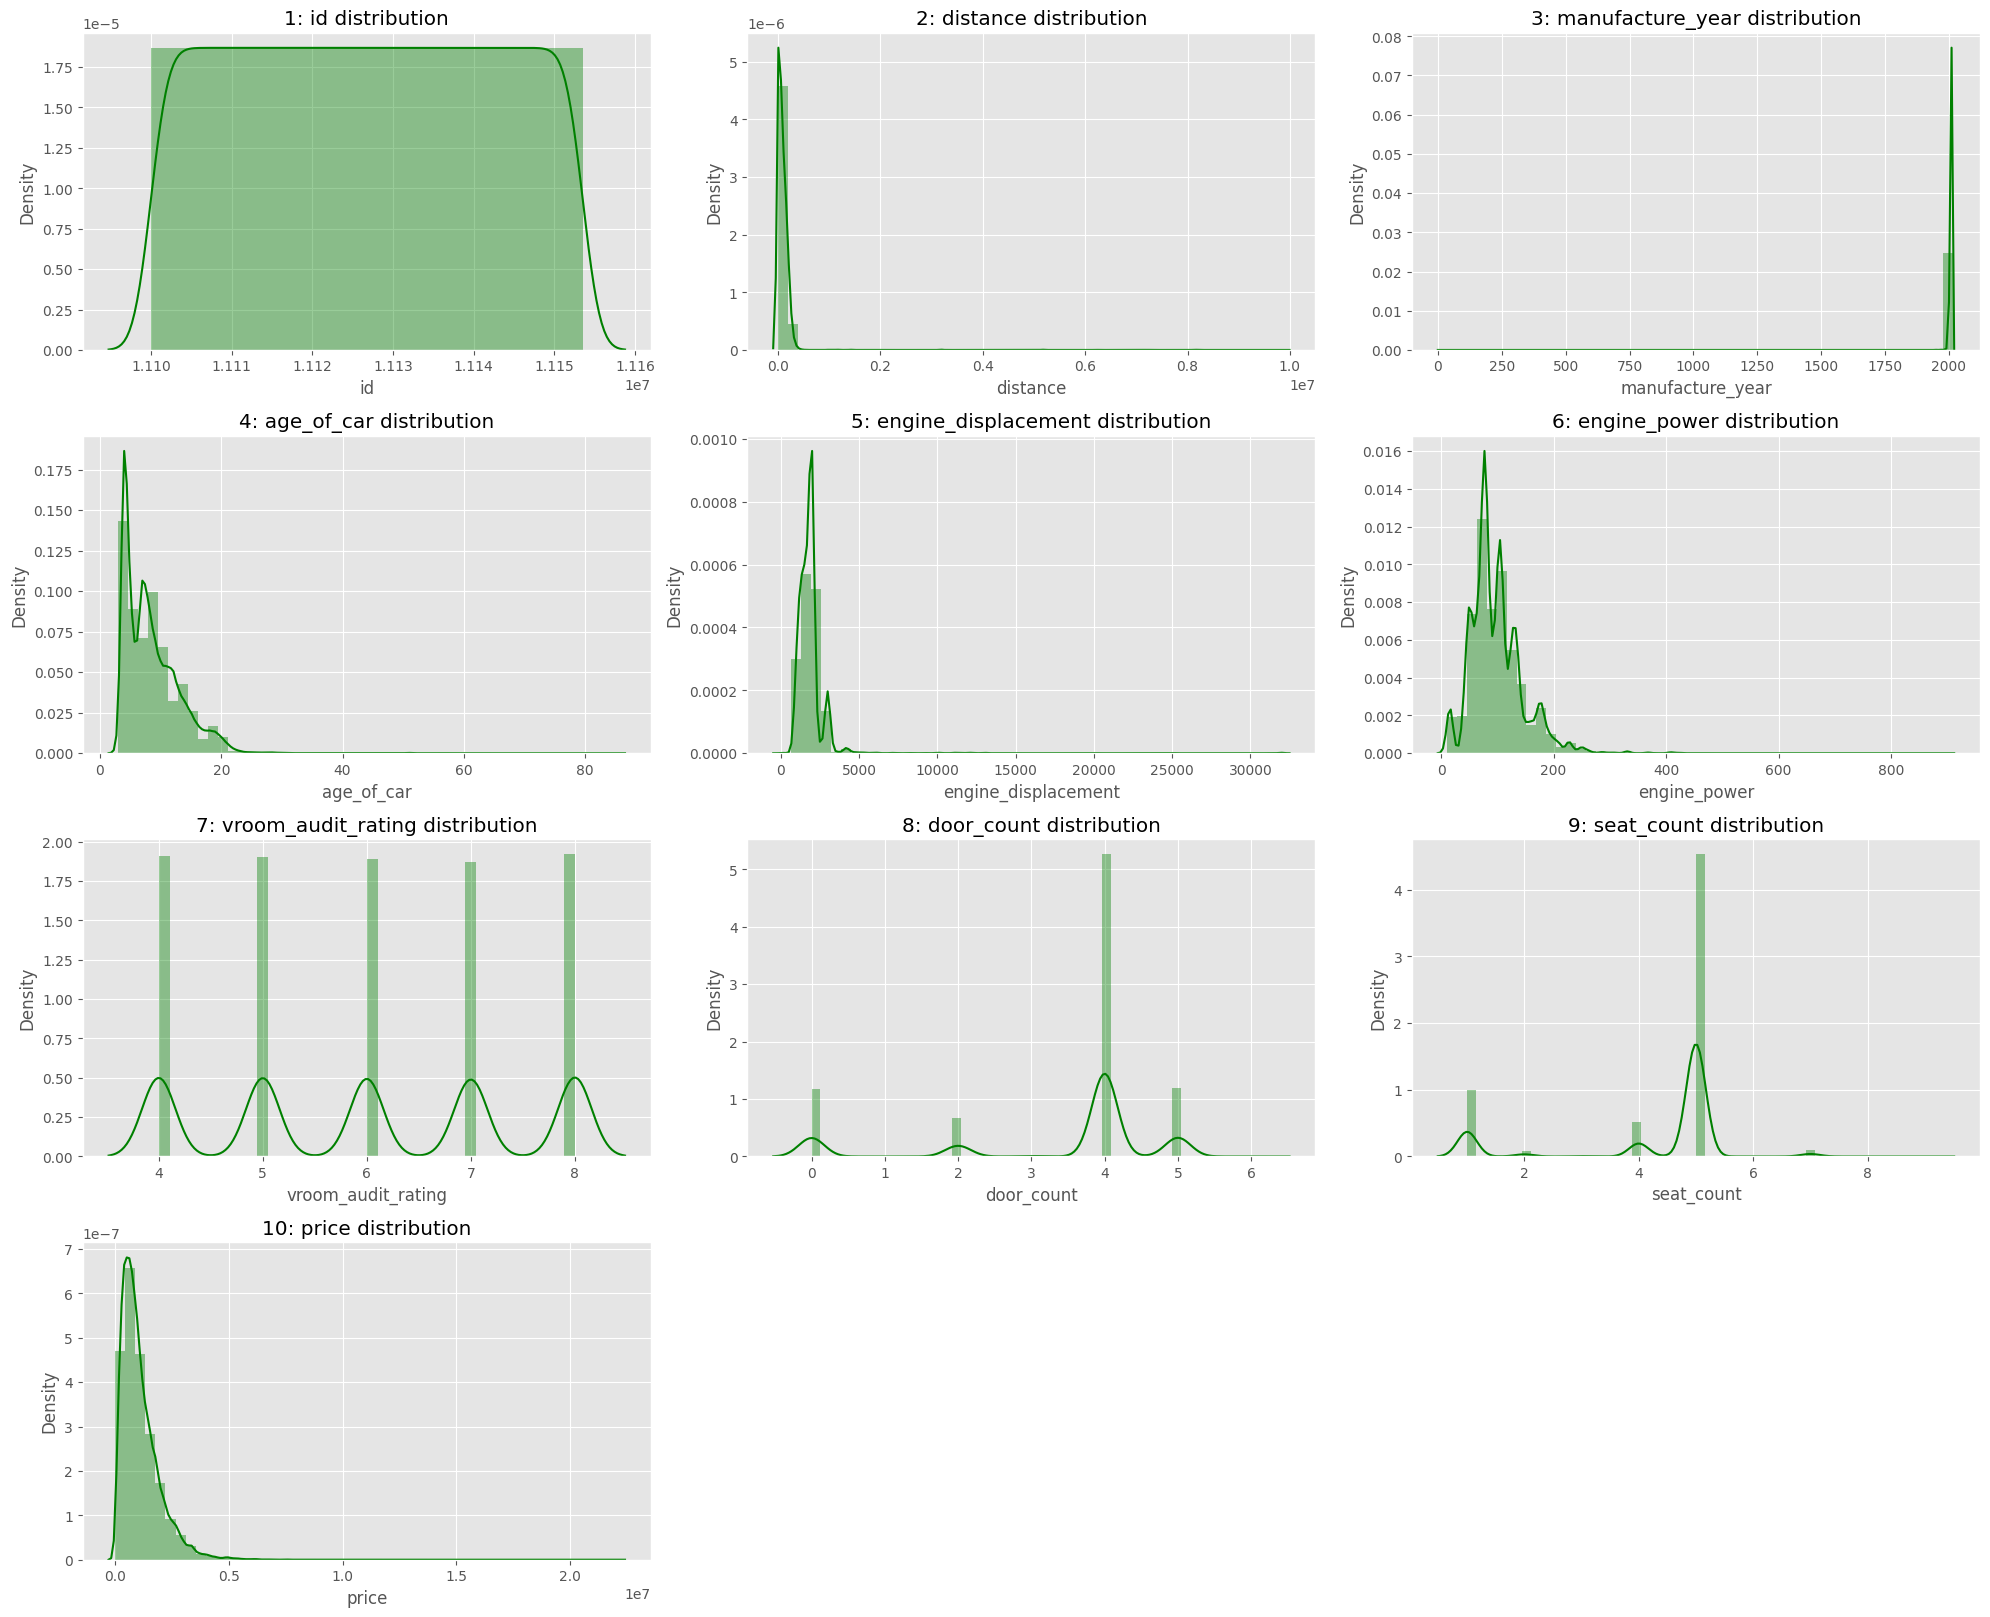

In [ ]:
plt.style.use('ggplot')
numeric_columns = modified_data_train.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,40))

for i, col in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                     sns.distplot(modified_data_train[col],kde=True,color='green')
                     plt.tight_layout()
                     plt.title(str(i+1)+ ': '+ col + ' distribution', color='black')

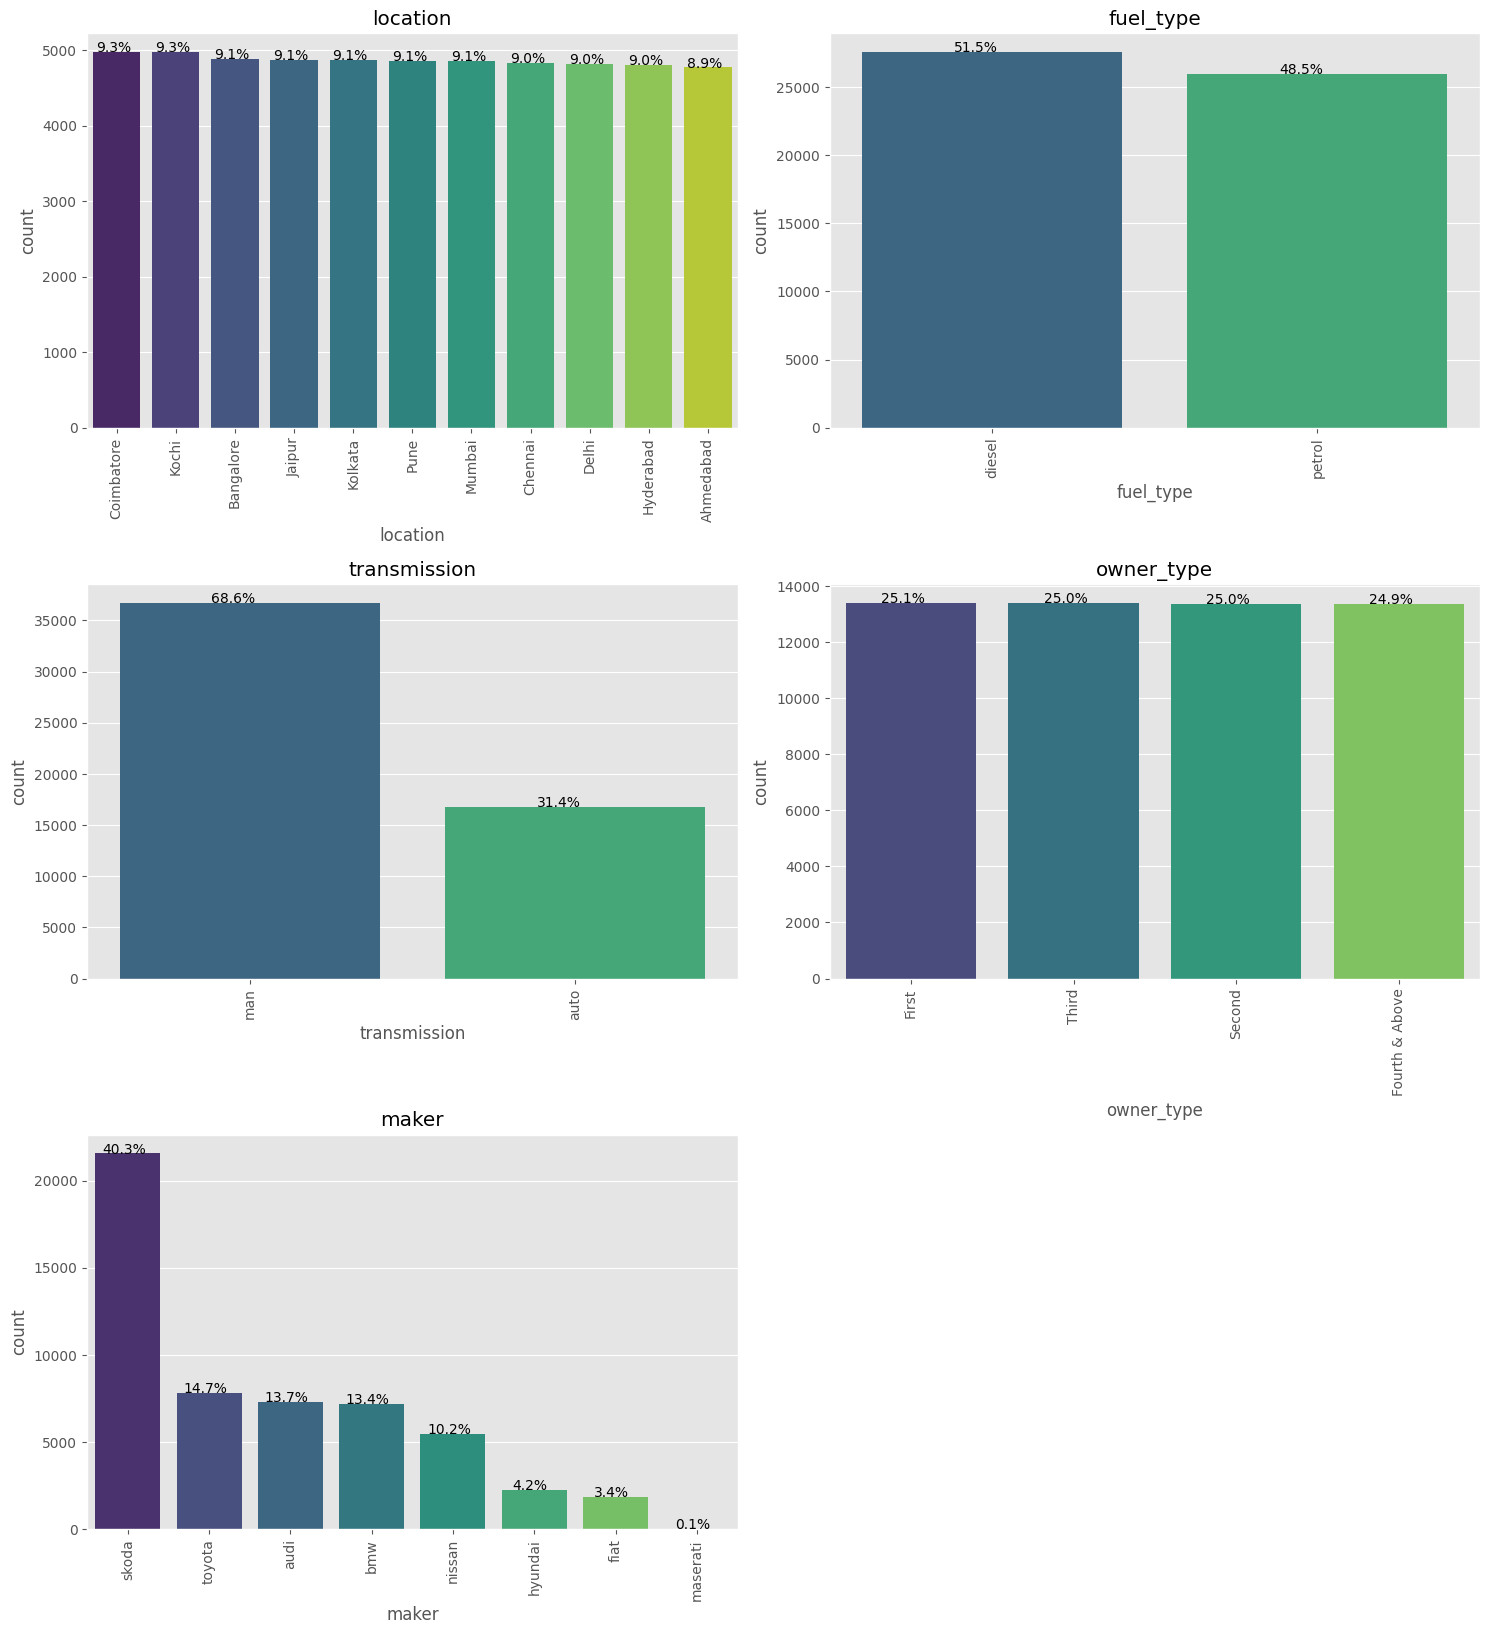

In [ ]:
cat_columns=['location','fuel_type','transmission', 'owner_type', 'maker'] #cars.select_dtypes(exclude=np.number).columns.tolist()
# The issue was that cat_columns had a element 'Owner Type' but the actual column name in modified_data_train was 'owner_type' (in small case).
# Changed 'Location' to 'location' and 'Owner Type' to 'owner_type'
plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = modified_data_train[variable].value_counts(ascending=False).index
                     ax=sns.countplot(x=modified_data_train[variable], data=modified_data_train , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(modified_data_train[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

We can witness some major differences in various columns.

1. Diesel vehicles are more than the petrol vehicles.
2. Coimbatore has the highes number of vehicles.
3. Maximum vehicles has the manual transmission.
4. 25.1% people are the first hand user.
5. Skoda dominates in the field of manufacturer.

Heatmap:

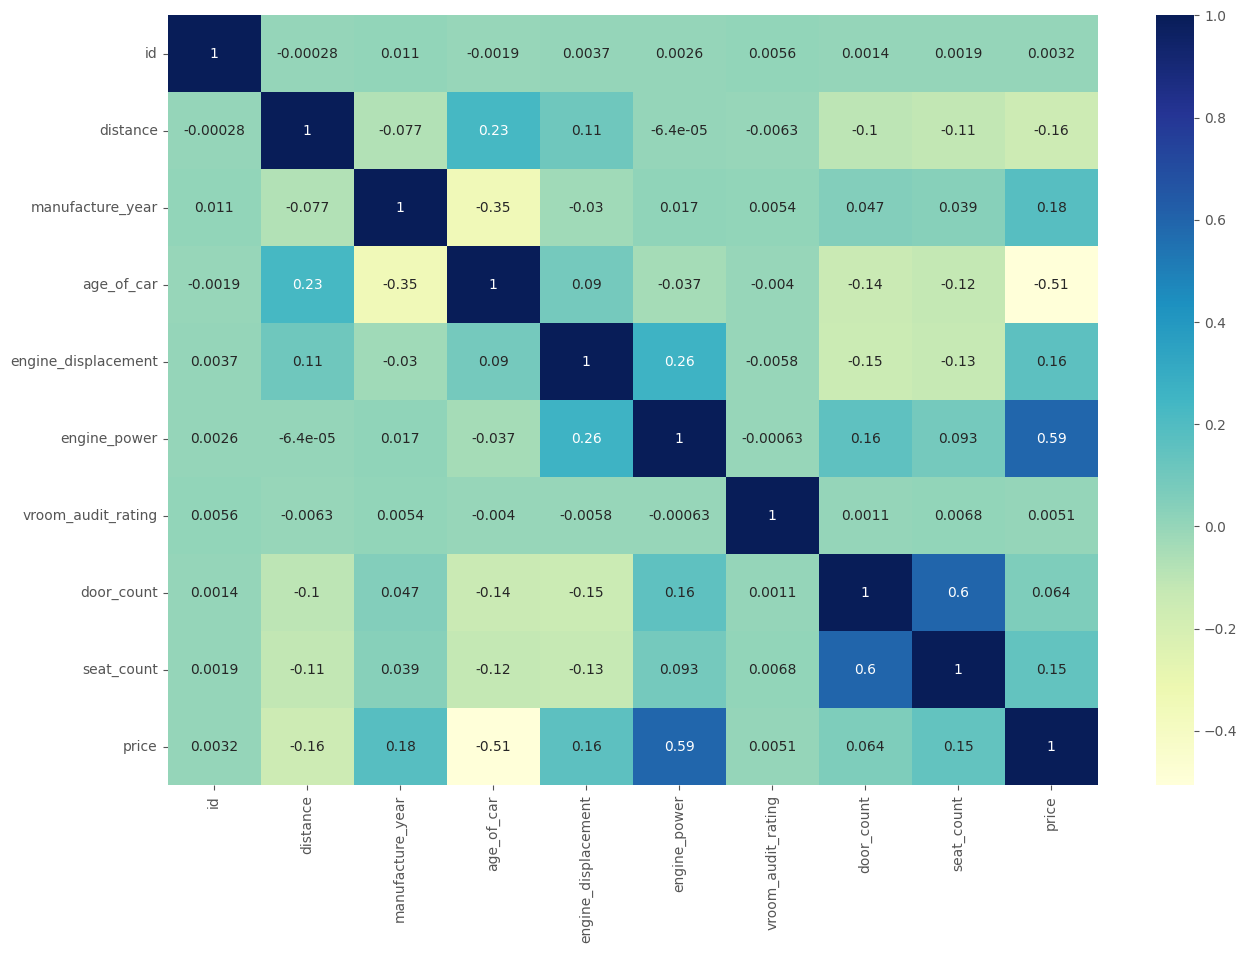

In [ ]:
plt.figure(figsize=(15,10))
# Select only numeric features for correlation calculation
numeric_data = modified_data_train.select_dtypes(include=np.number)
sns.heatmap(data=numeric_data.corr(), annot=True, cmap='YlGnBu');

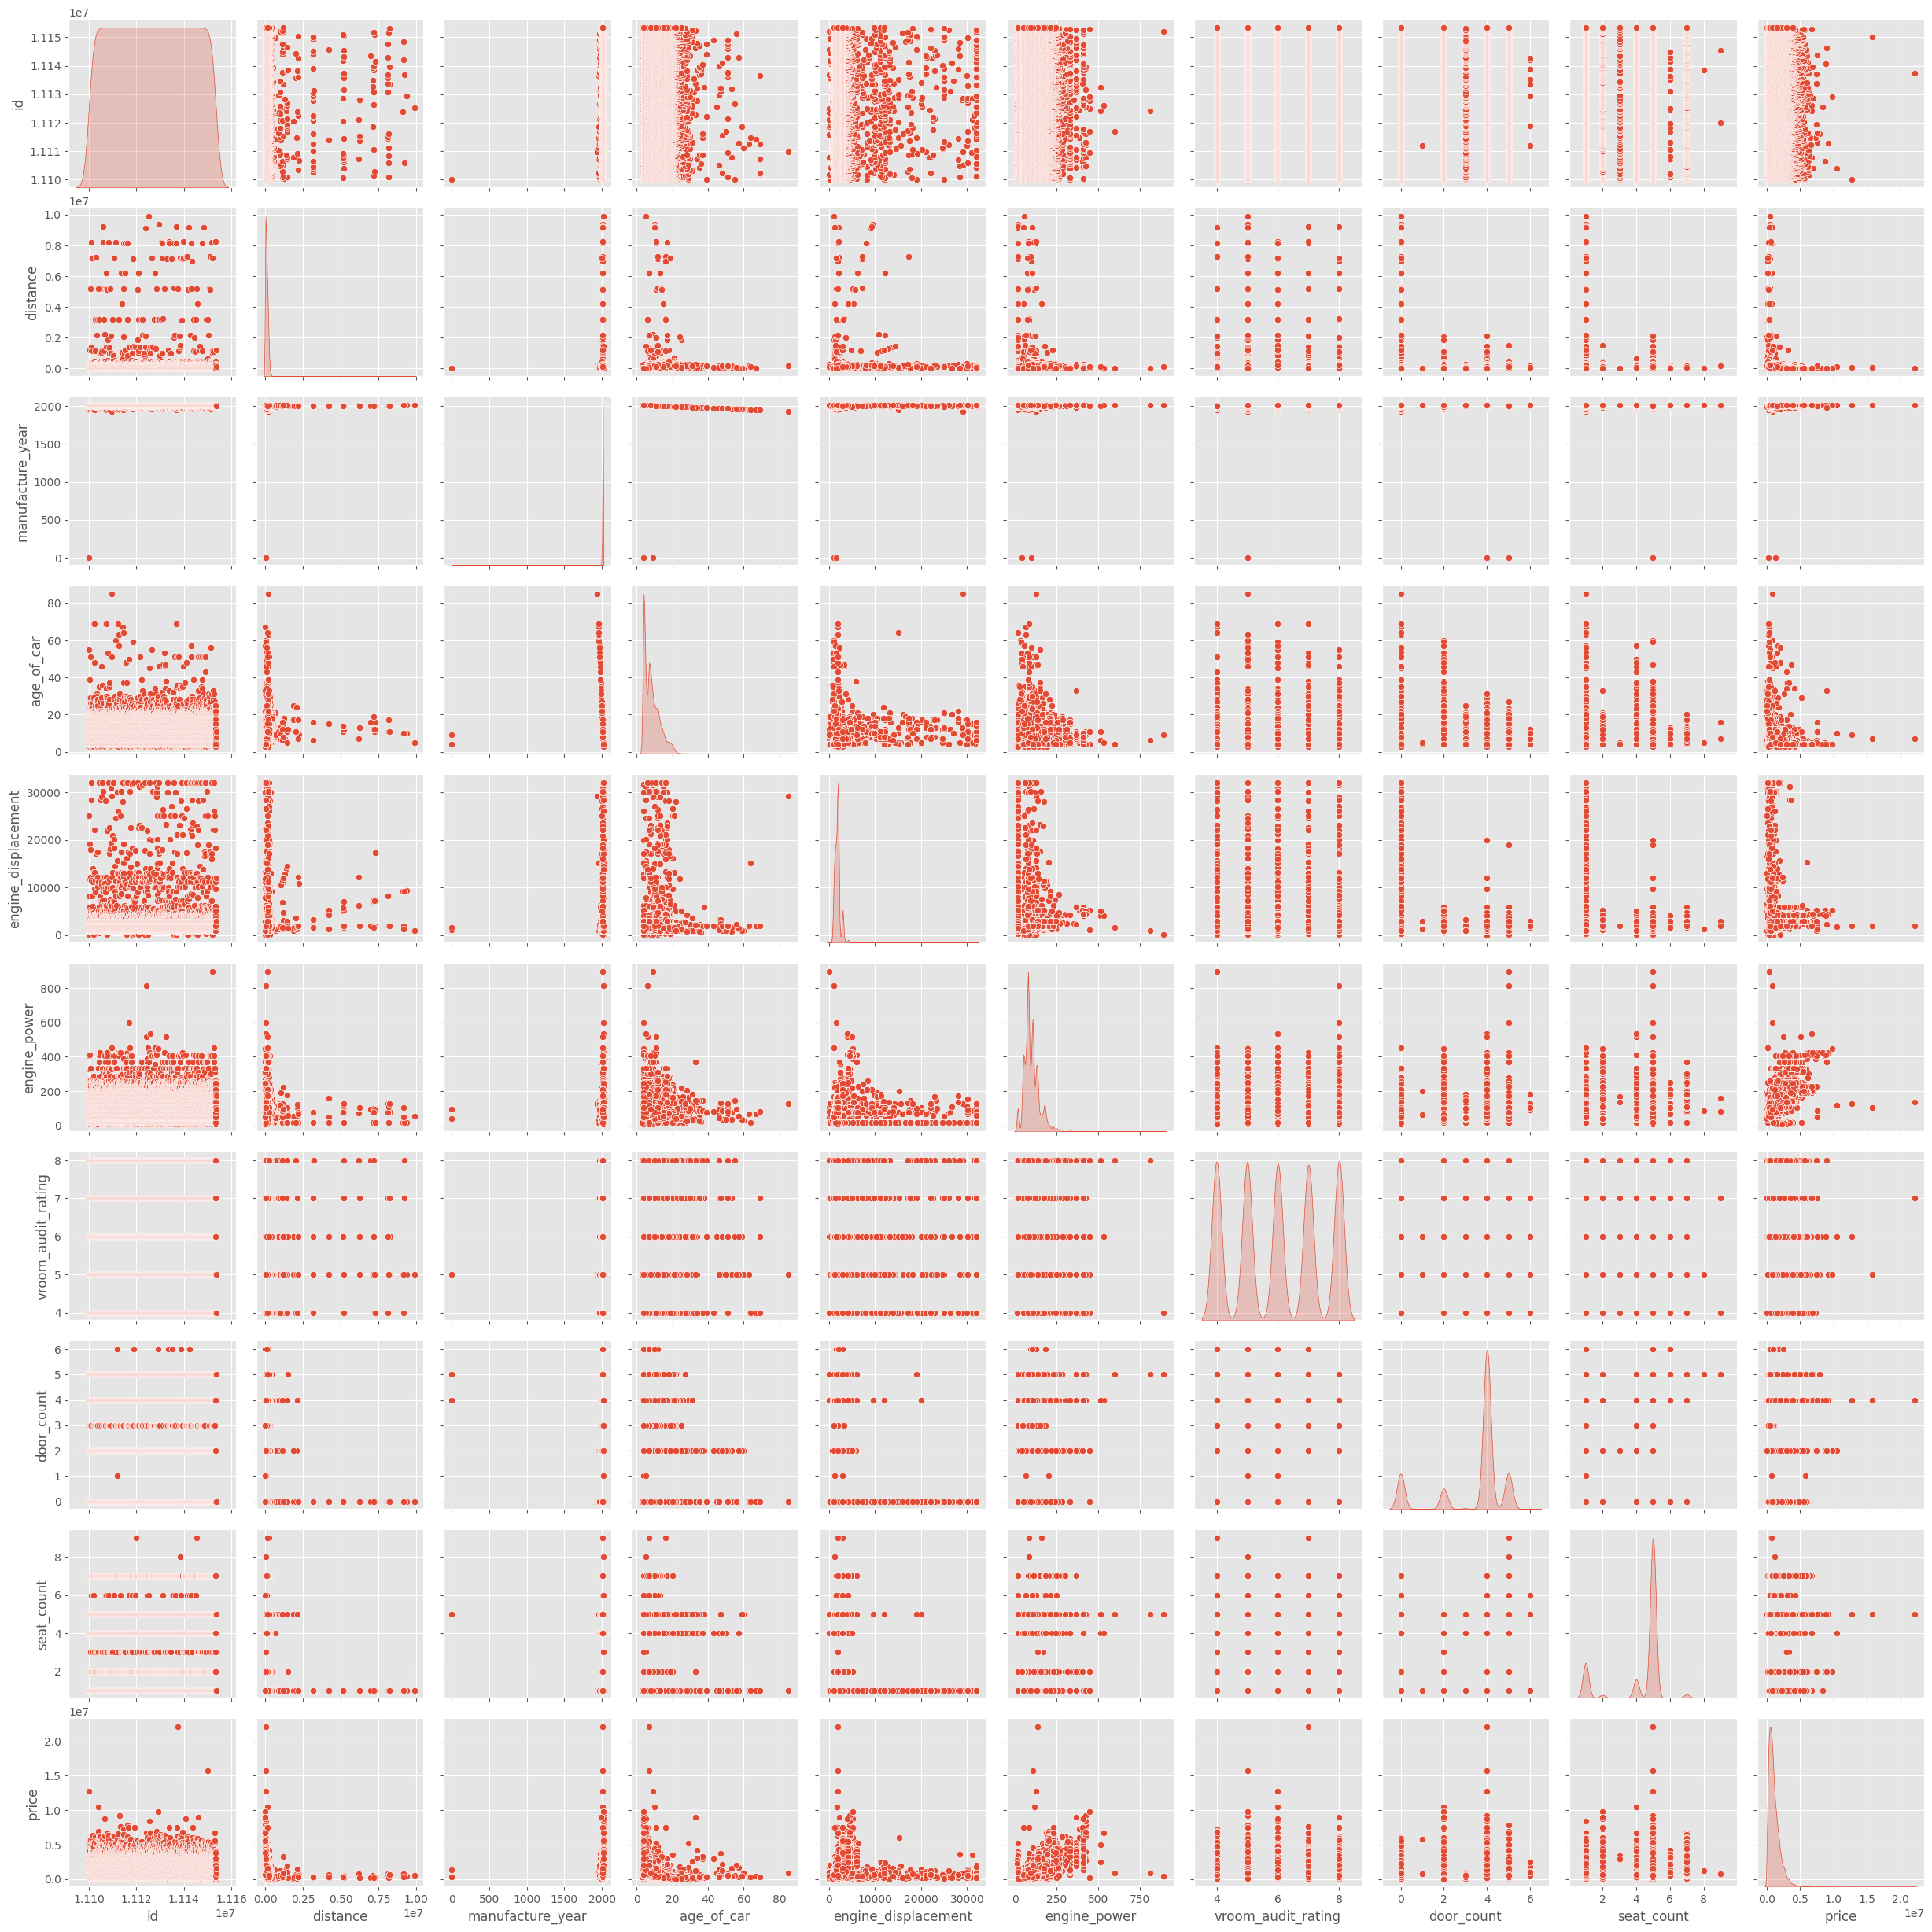

In [ ]:
sns.pairplot(data=modified_data_train, corner = False, diag_kind='kde');

In [ ]:
def bivariate_analysis(modified_data_train, x, cat_list):
    fig, axes=plt.subplots(int(len(cat_list)/2 if len(cat_list) % 2 == 0 else (len(cat_list)+1)/2), 2, \
                           figsize=(20,40))
    i = 0
    for h in cat_list:
        #sns.countplot(data=df, x=x, hue=h)
        sns.boxplot(data=modified_data_train, x=h, y=x, showmeans=True, ax=axes[i//2, i%2]).set(title=x + ' By ' + h)
        i+=1

In [ ]:
modified_data_train.sample()

id   maker location  distance owner_type  manufacture_year  \
40500  11140501  toyota   Mumbai  170000.0      Third            2002.0   

       age_of_car  engine_displacement  engine_power body_type  \
40500          17                 1998         110.0       0.0   

       vroom_audit_rating transmission  door_count  seat_count fuel_type  \
40500                   4          man         4.0         5.0    petrol   

          price   brand  
40500  210022.5  TOYOTA

Bivariate Analysis:

In [ ]:
def bivariate_analysis(modified_data_train, x, cat_list):
    # Ensure 'x' column exists in the DataFrame
    if x not in modified_data_train.columns:
        raise ValueError(f"Column '{x}' not found in the DataFrame.")

    fig, axes = plt.subplots(int(len(cat_list) / 2 if len(cat_list) % 2 == 0 else (len(cat_list) + 1) / 2), 2,
                            figsize=(20, 40))
    i = 0
    for h in cat_list:
        # Ensure 'h' column exists in the DataFrame
        if h not in modified_data_train.columns:
            raise ValueError(f"Column '{h}' not found in the DataFrame.")

        sns.boxplot(data=modified_data_train, x=h, y=x, showmeans=True, ax=axes[i // 2, i % 2]).set(
            title=x + ' By ' + h)
        i += 1

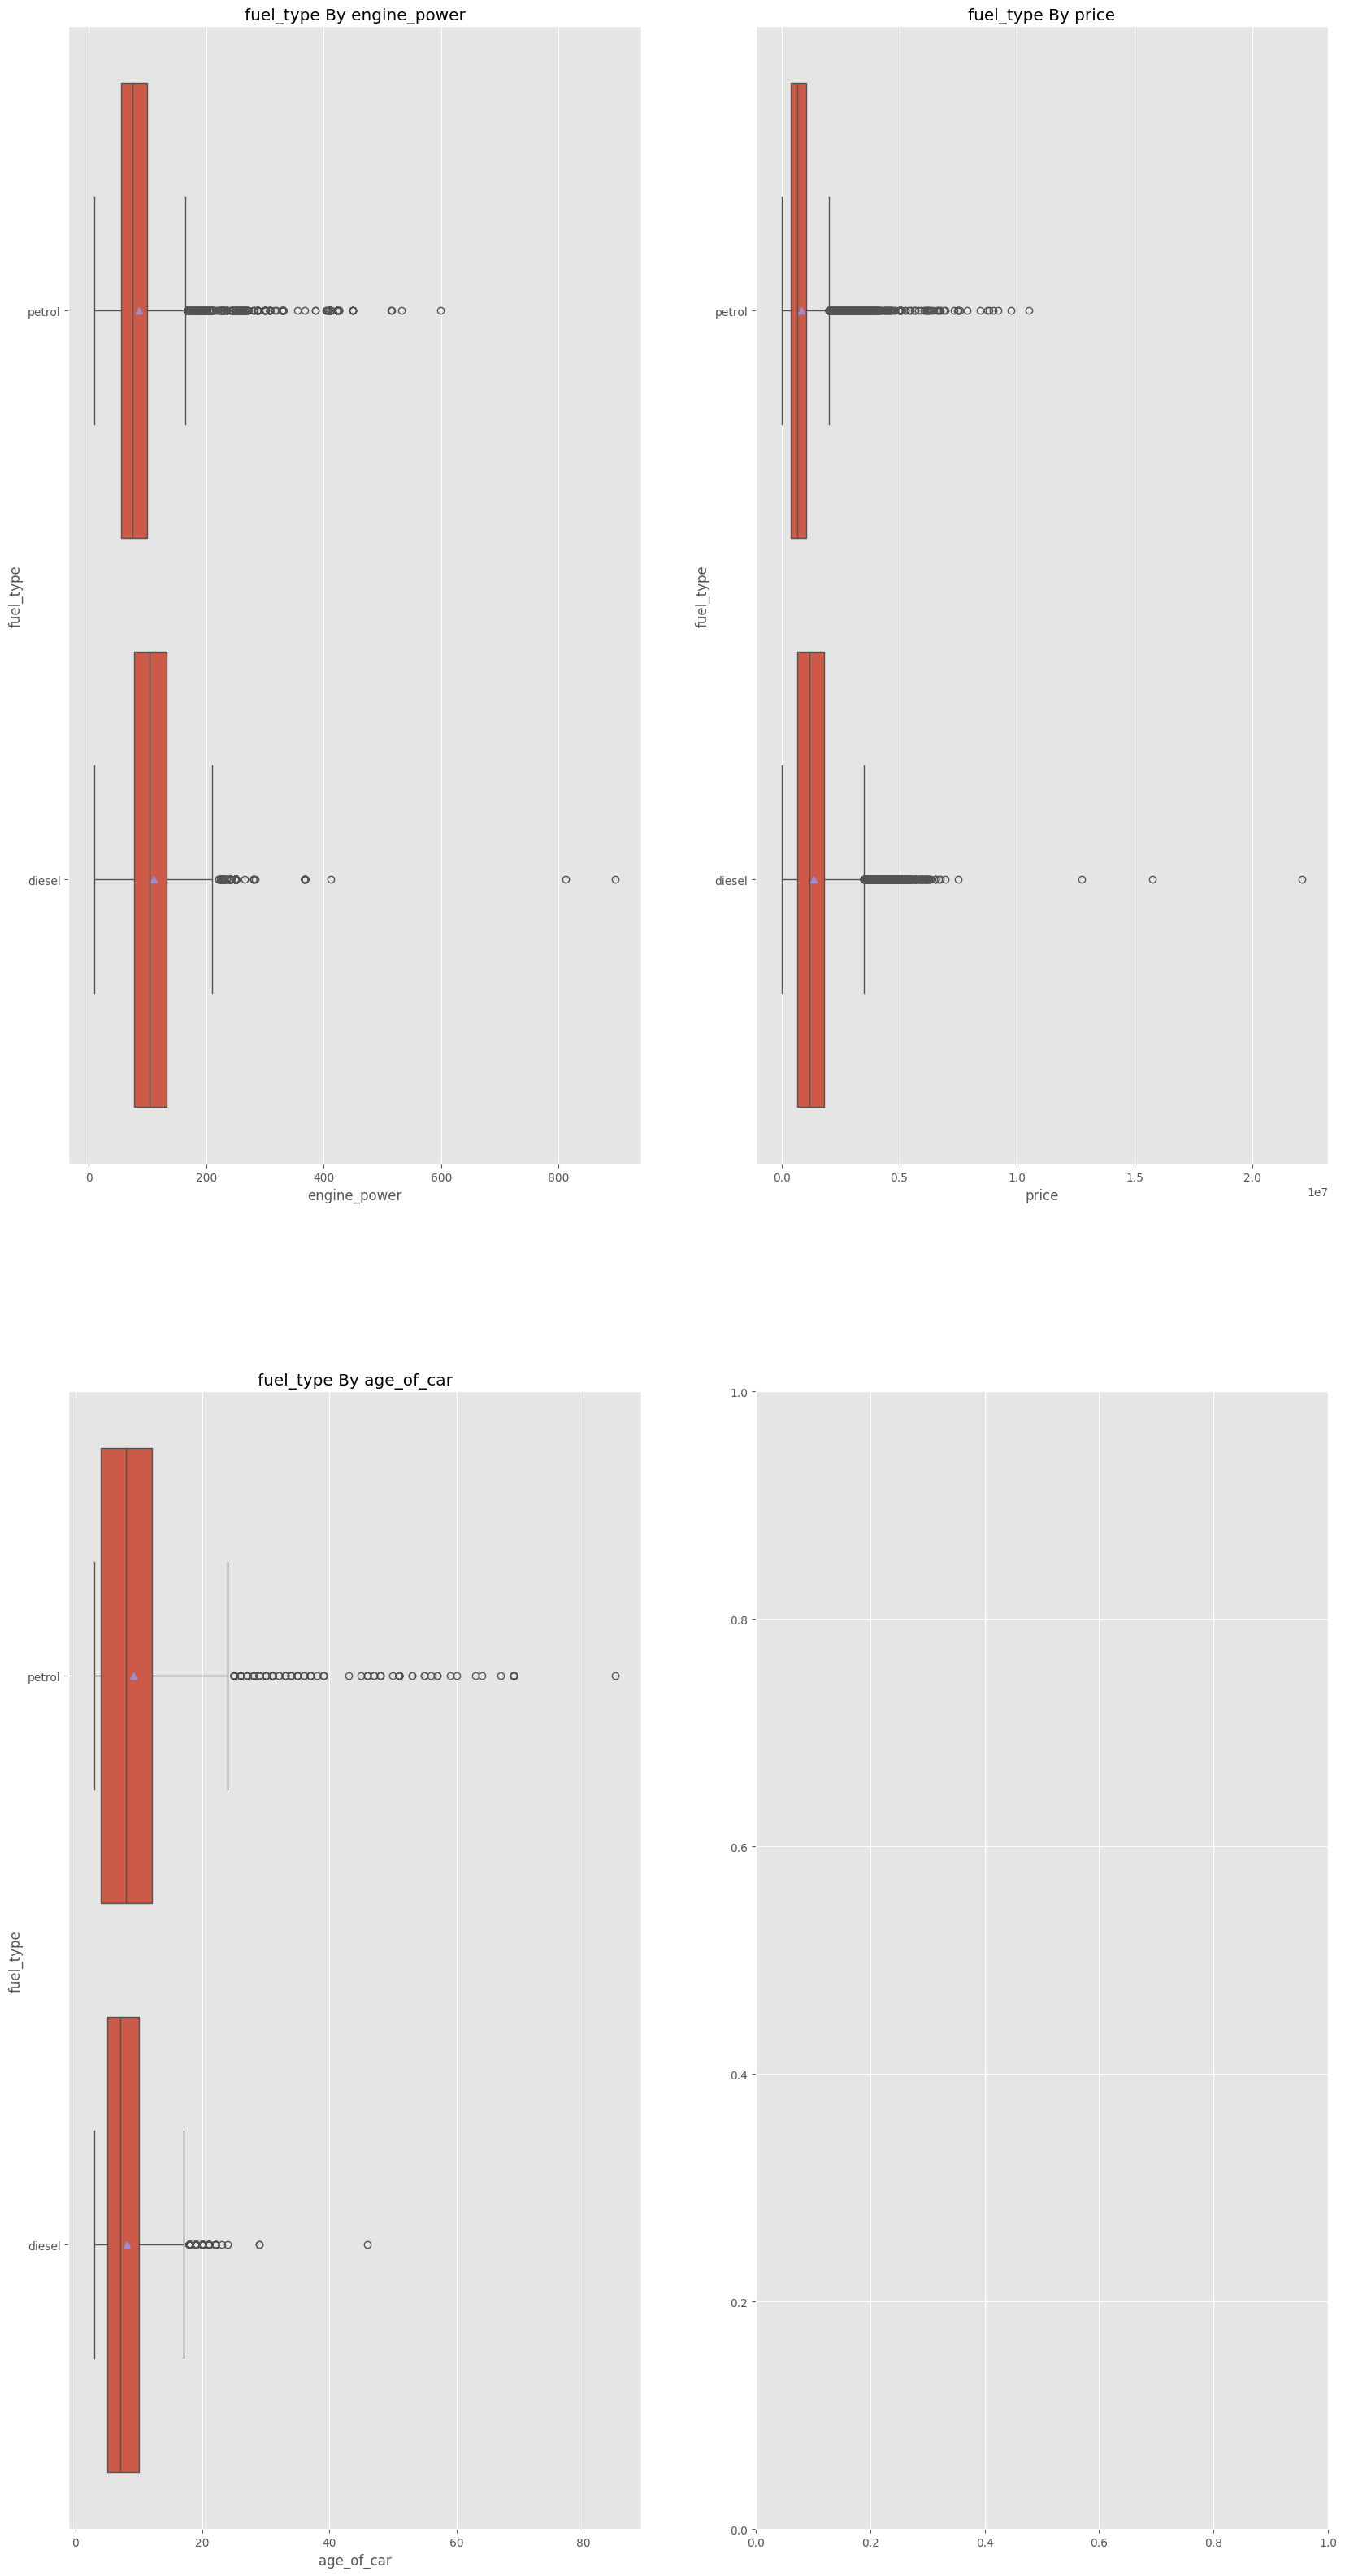

In [ ]:
bivariate_analysis(modified_data_train, x='fuel_type', \
                   cat_list=['engine_power', 'price', 'age_of_car'])

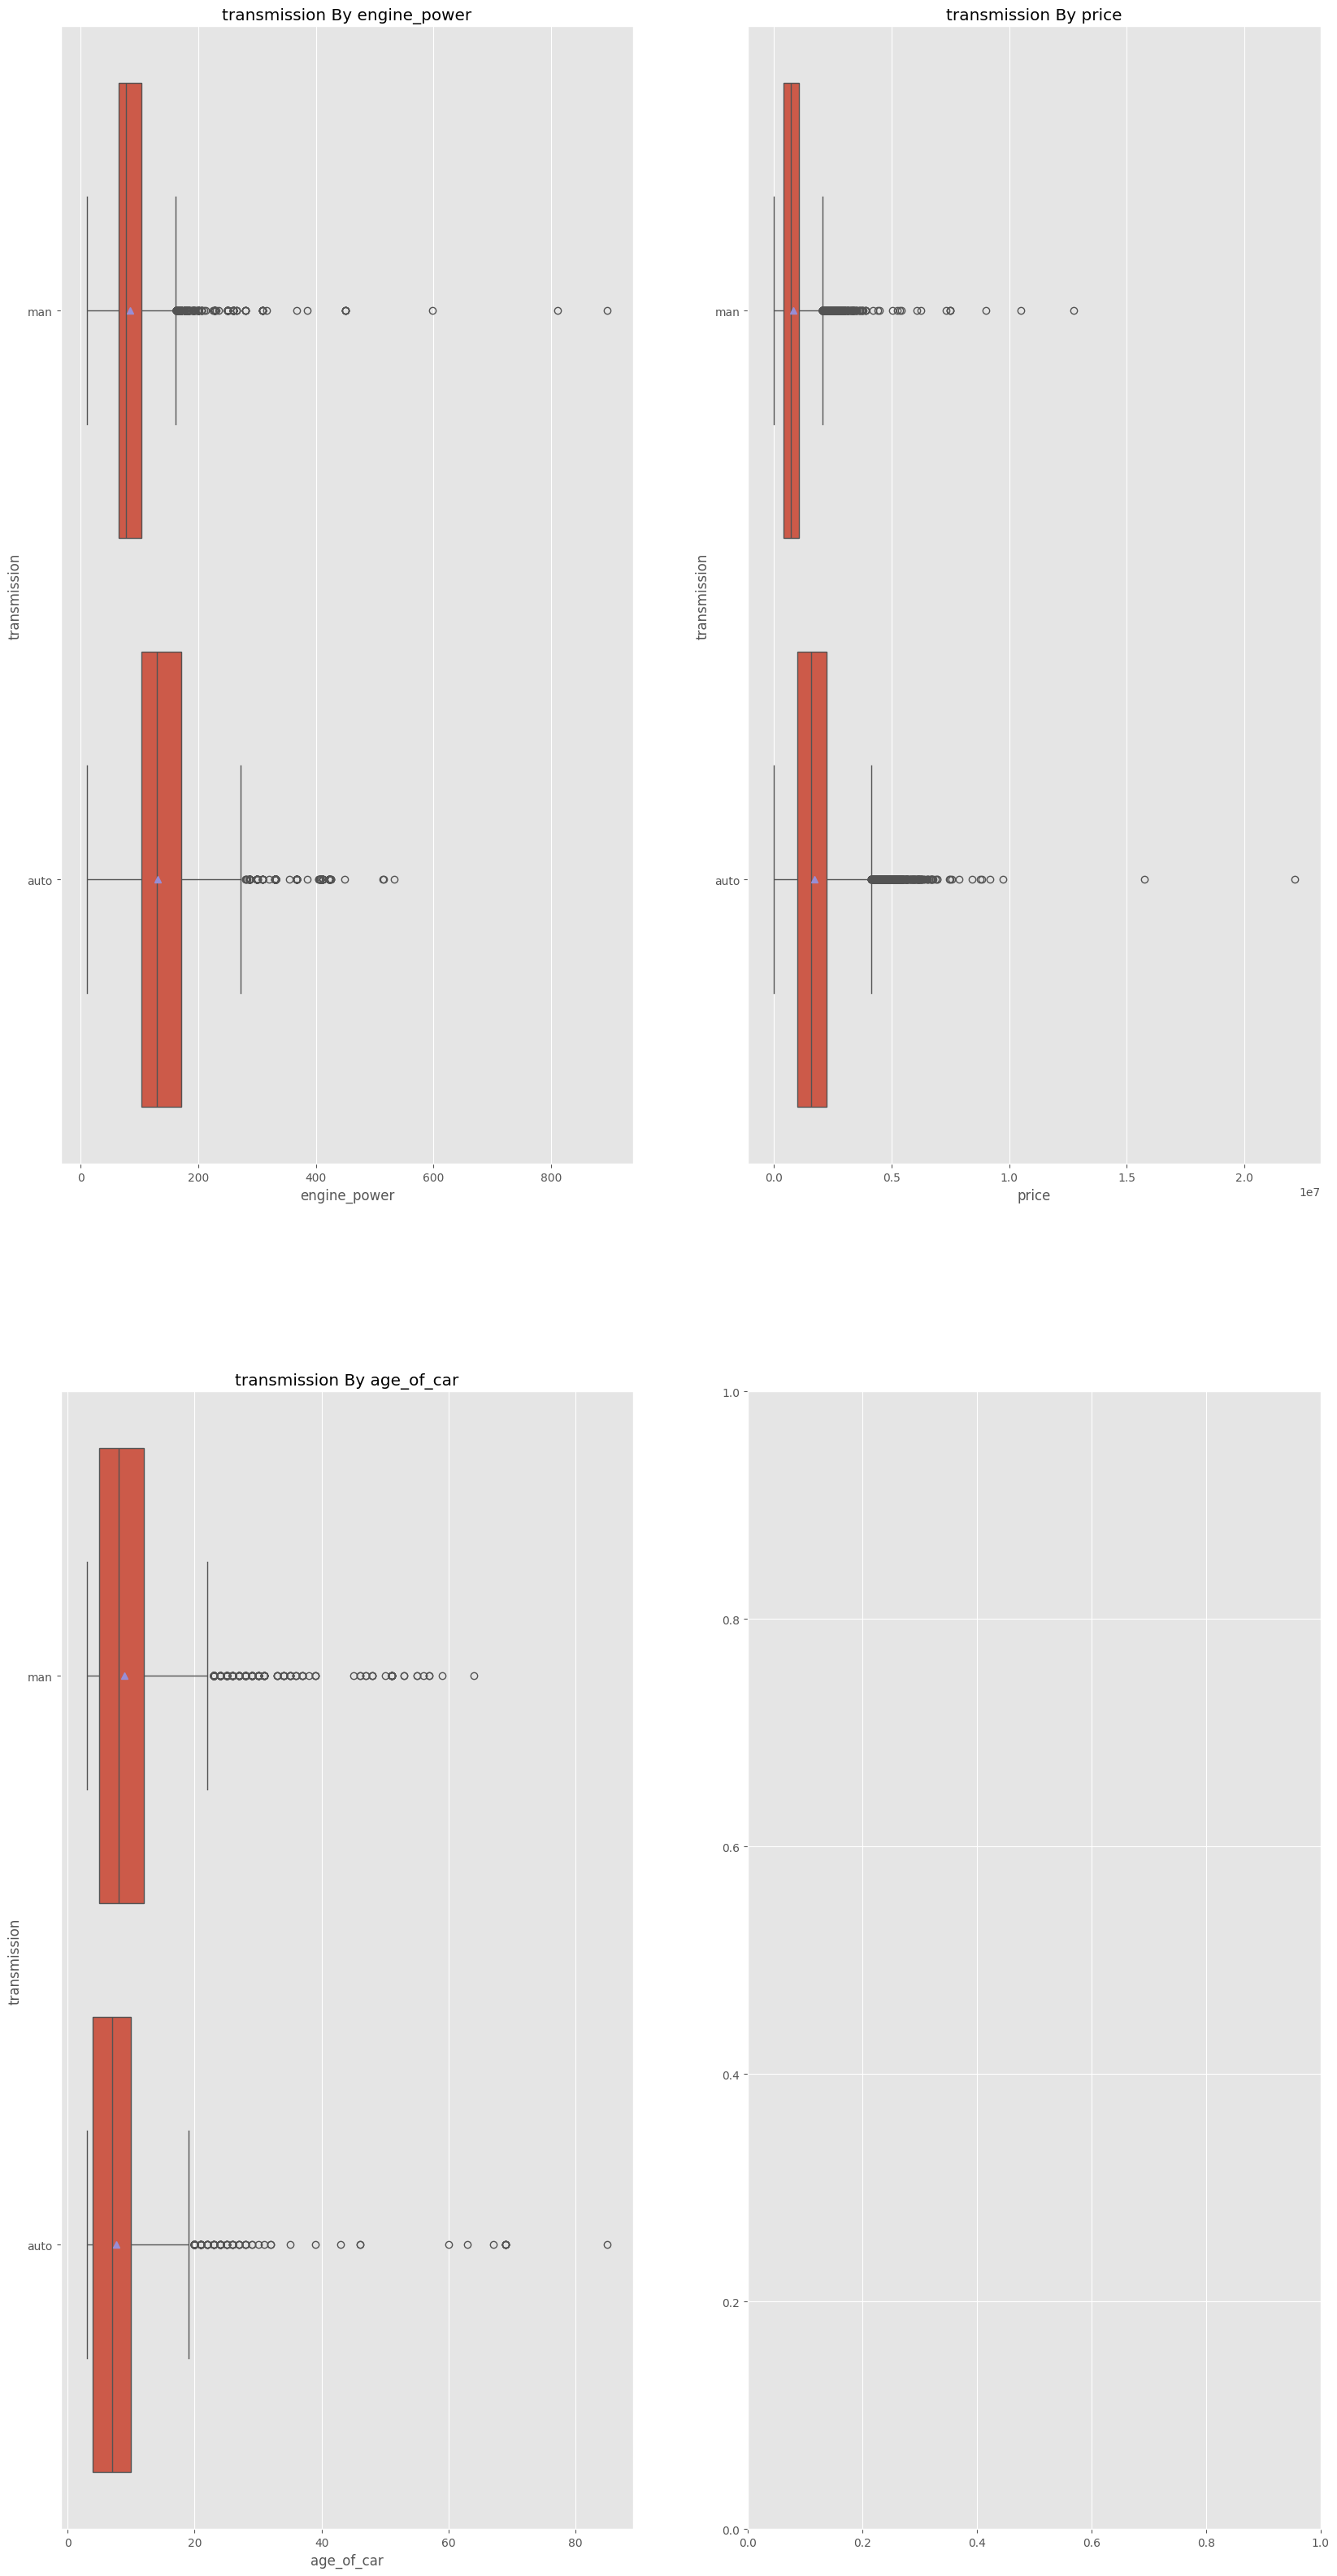

In [ ]:
bivariate_analysis(modified_data_train, x='transmission', \
                   cat_list=['engine_power', 'price', 'age_of_car'])

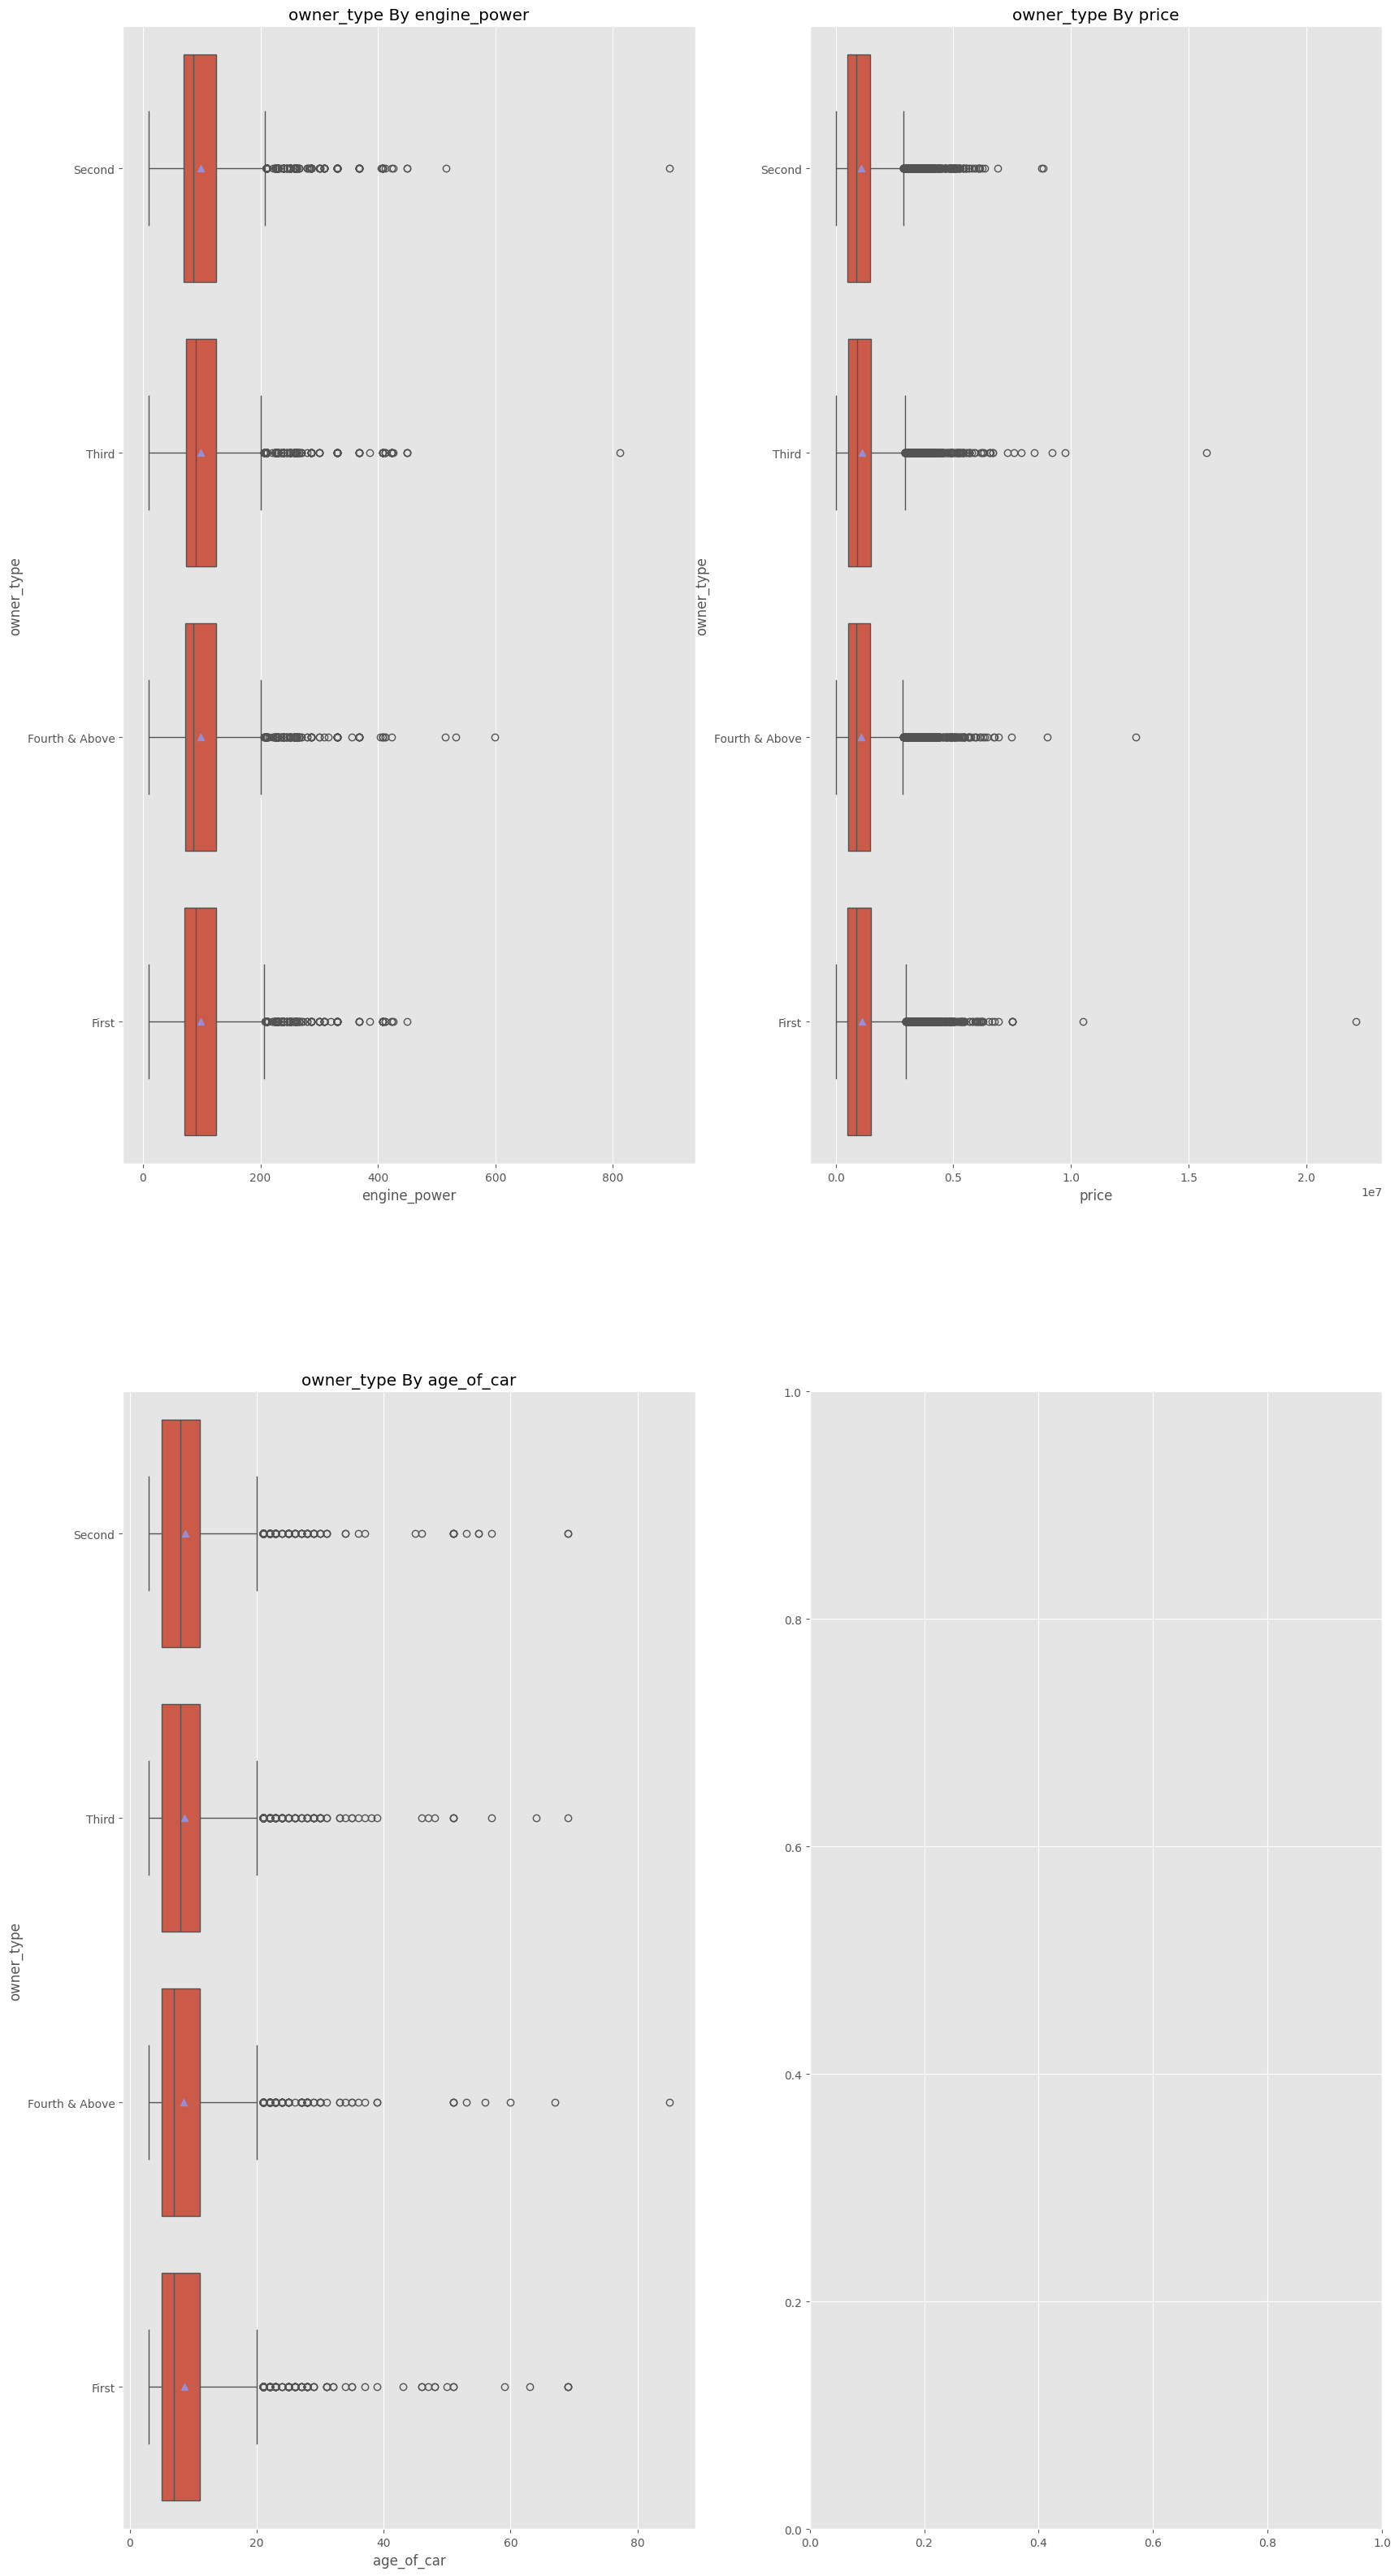

In [ ]:
bivariate_analysis(modified_data_train, x='owner_type', \
                   cat_list=['engine_power', 'price', 'age_of_car'])

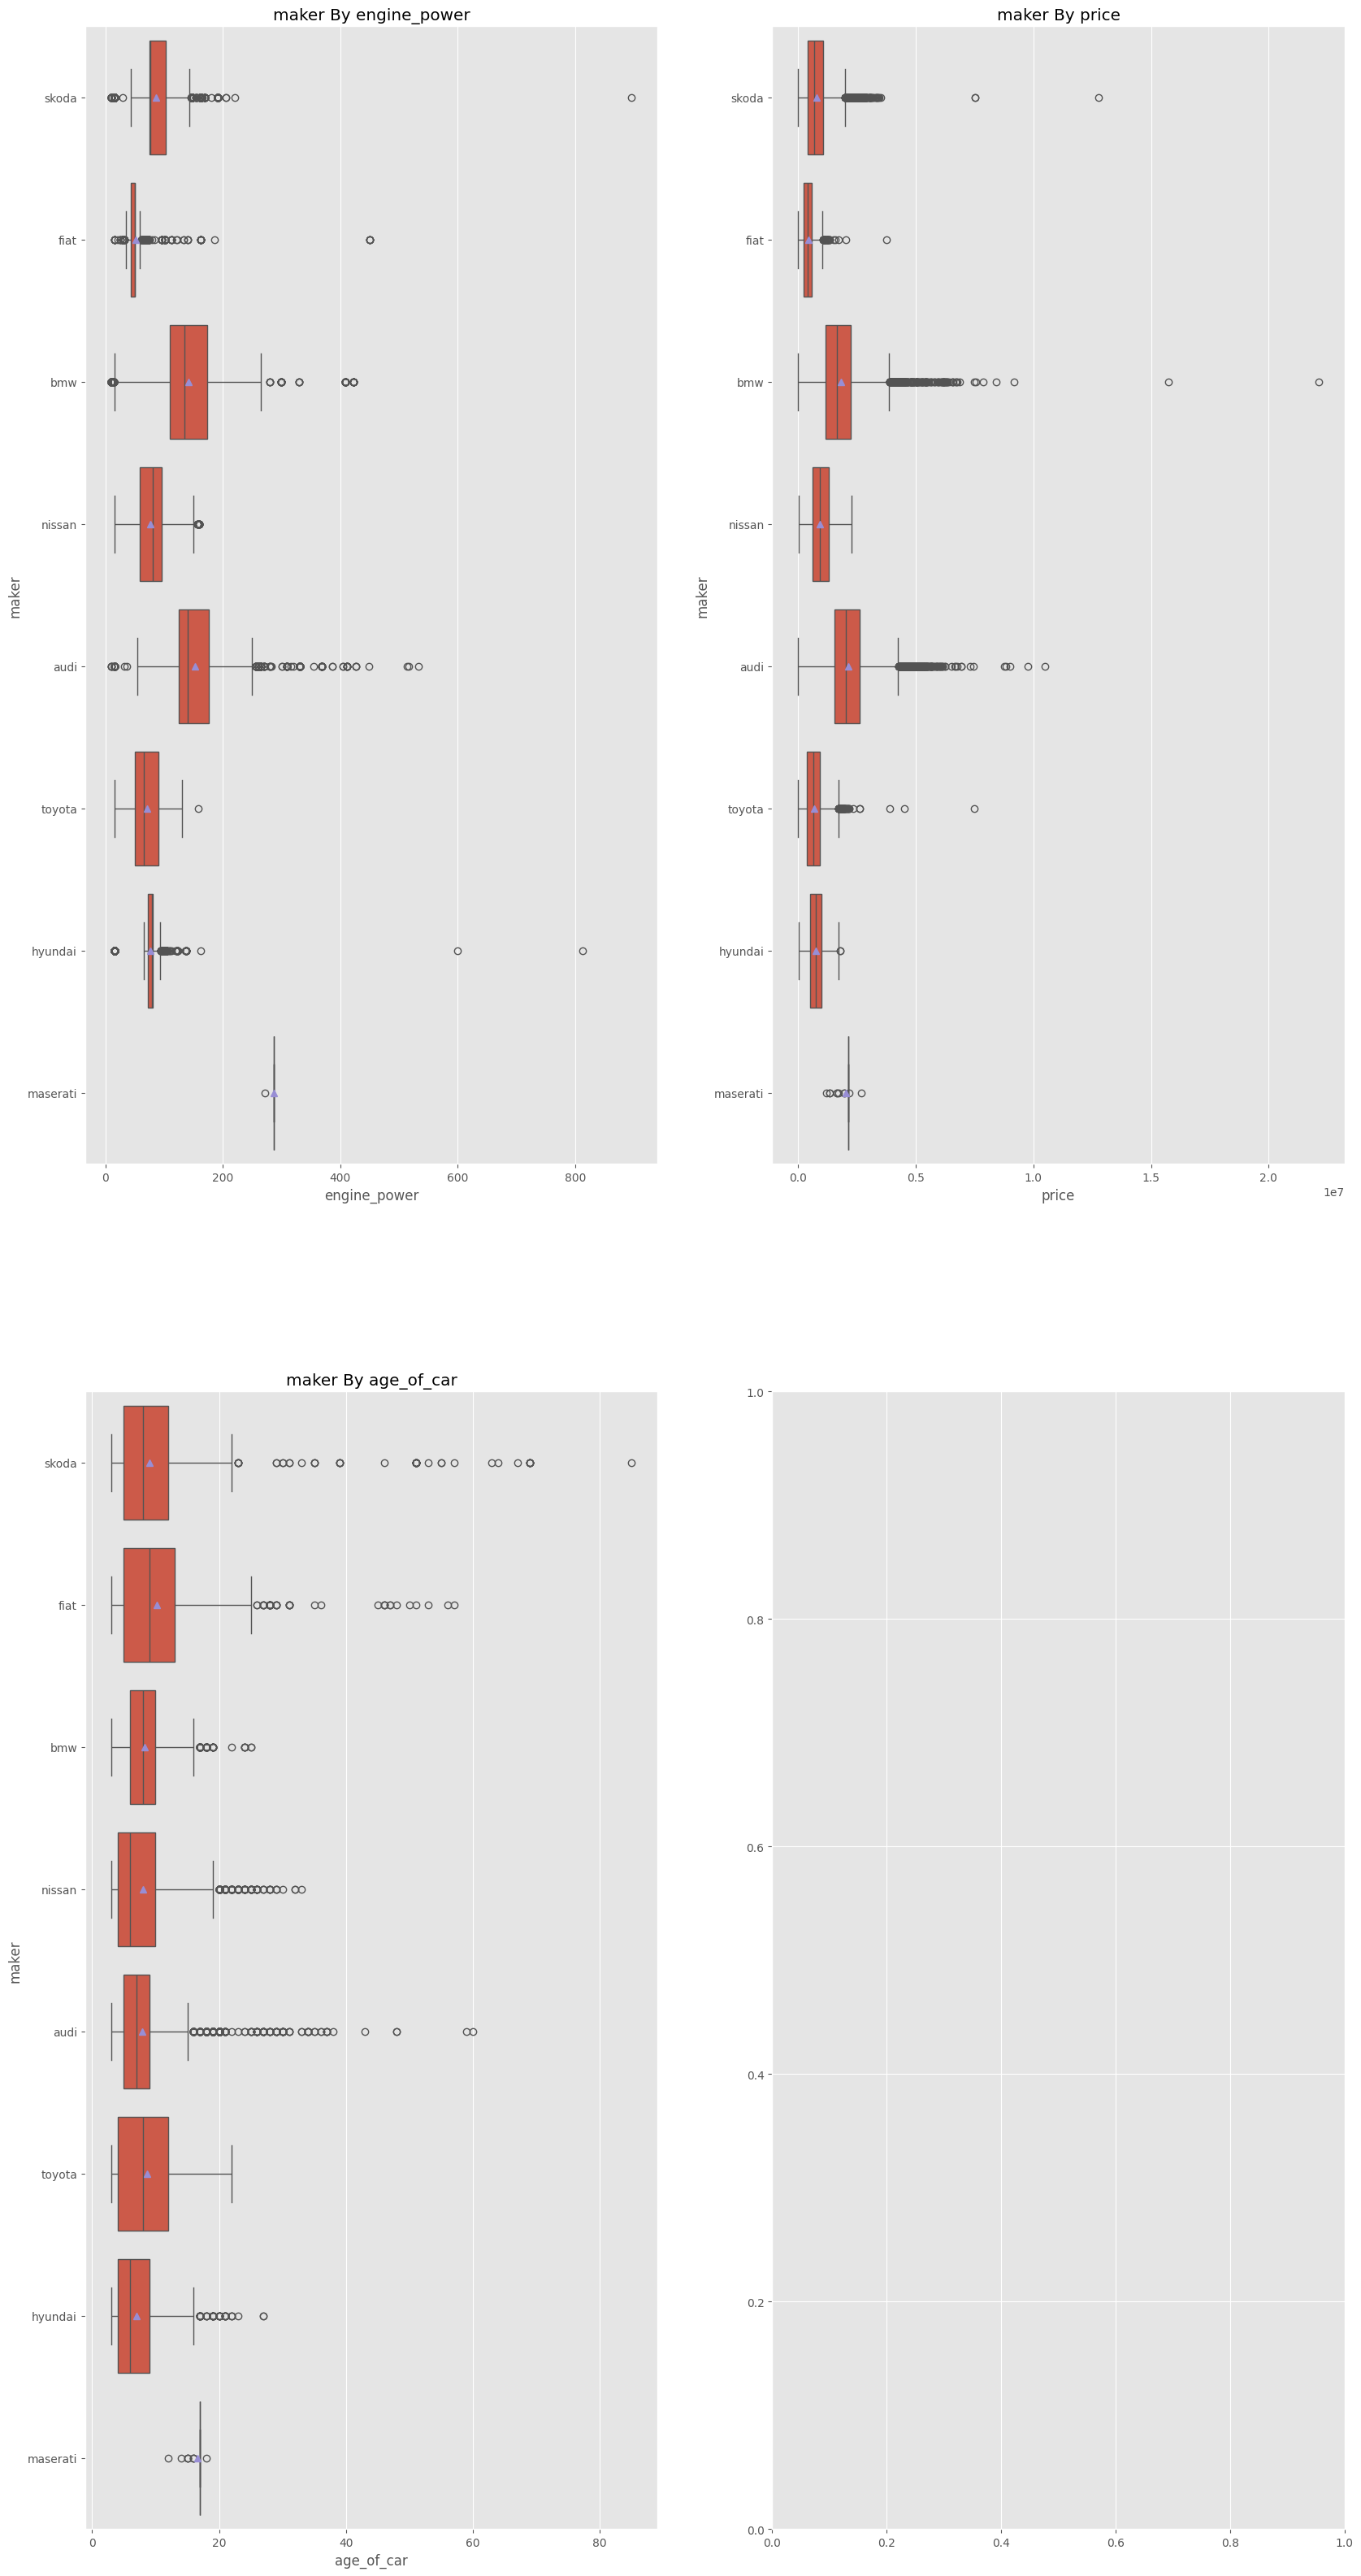

In [ ]:
bivariate_analysis(modified_data_train, x='maker', \
                   cat_list=['engine_power', 'price', 'age_of_car'])

In [ ]:
def categorical_plots(modified_data_train, x, y, hue, kind, size):
    '''
    Signature:
    categorical_plots(modified_data_train, x, y, hue, kind, size):

    Parameters:
    modified_data_train = pandas dataframe
    x = x axis, quantitative feature for scatter and line kind, qualitative feature for line kind
    y = y axis, quantitative feature
    hue = hue parameter by categorical/qualitative feature, unused for bar kind
    kind = {scatter|bar|line}
    size = tuple (width, height) format
    '''
    plt.figure(figsize=size)
    if kind == 'scatter':
        plt.title(x + ' vs. ' + y + ' by ' + hue)
        sns.scatterplot(data=modified_data_train, x=x, y=y, hue=hue);
    elif kind == 'line':
        plt.title(x + ' vs. ' + y + ' by ' + hue)
        sns.lineplot(data = modified_data_train, x = x, y = y, hue = hue);
    elif kind == 'bar':
        plt.title(x + ' vs. ' + y)
        sns.barplot(data = modified_data_train, x = x, y = y, hue=None)

Price vs Transmission:

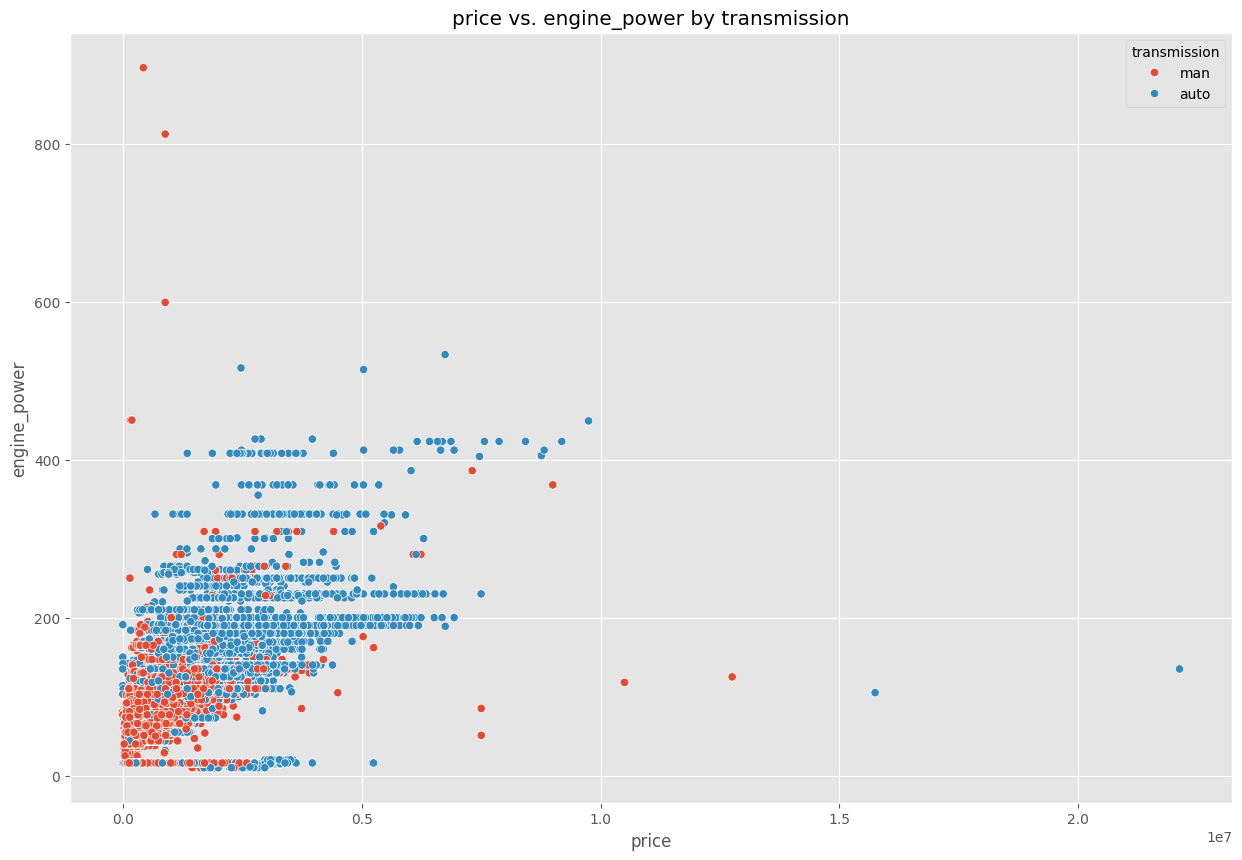

In [ ]:
categorical_plots(modified_data_train, 'price', 'engine_power', 'transmission', 'scatter', (15, 10))

Year vs Price:

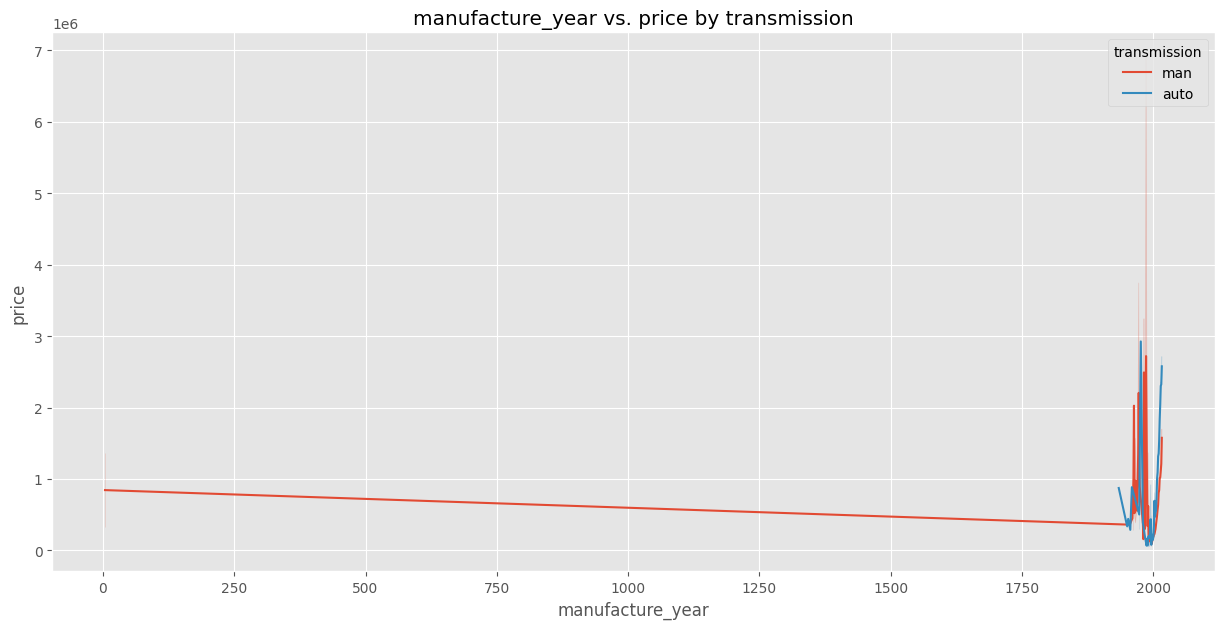

In [ ]:
categorical_plots(modified_data_train, 'manufacture_year', 'price', 'transmission', 'line', (15,7))

1. **Overall Trend:** The graph typically shows an overall trend of how car prices change with the year of manufacture. Most often, newer cars tend to have higher prices than older cars, but this can vary based on other factors like the car's make, model, condition, and mileage.

2.**Transmission Effect:** The separate lines for different transmission types help us see if there's a significant price difference between manual and automatic cars across different years. Generally, automatic cars tend to be priced higher than manual cars due to their ease of use and increasing popularity.

3.**Price Fluctuations:** The graph may reveal some fluctuations or variations in prices over the years, potentially due to economic factors, changes in technology or consumer preferences, or the introduction of new models.

4.**Outliers:** There might be some outliers or data points that don't follow the general trend. These could represent rare or special vehicles with particularly high or low prices for their age.

Price vs Year vs Fuel Type:

<Axes: title={'center': 'Price Vs Year VS FuelType'}, xlabel='manufacture_year', ylabel='price'>

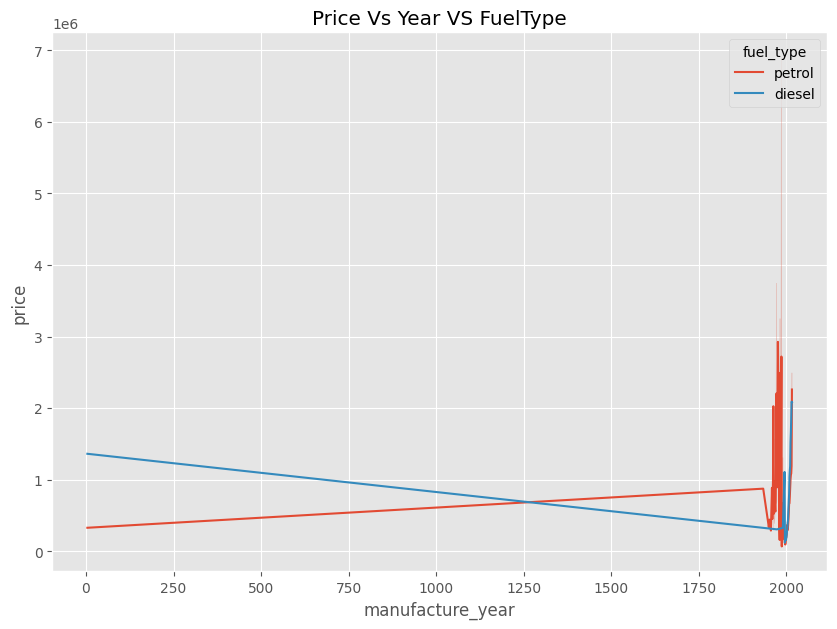

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='manufacture_year', y='price',hue='fuel_type',
             data=modified_data_train)

Year vs Price vs Owner type:

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}, xlabel='manufacture_year', ylabel='price'>

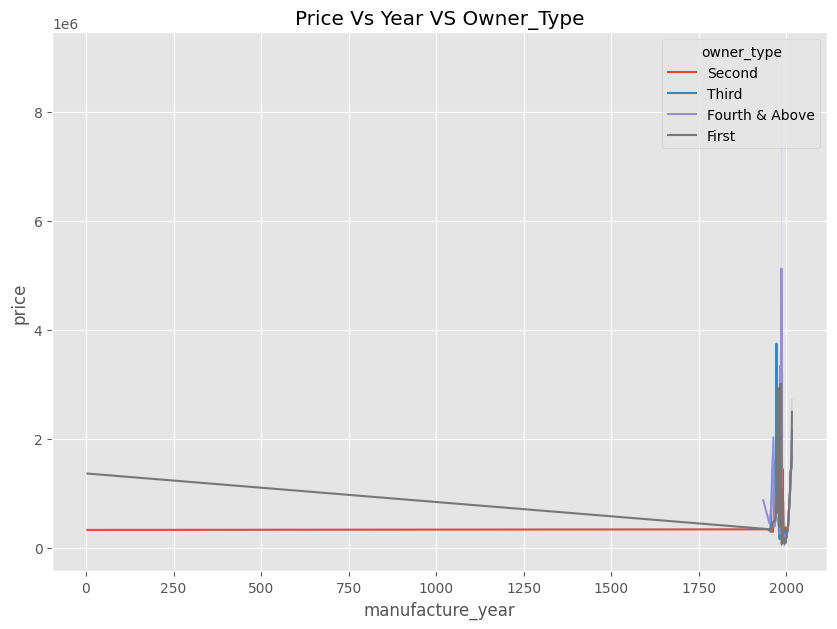

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='manufacture_year', y='price',hue='owner_type',
             data=modified_data_train)

Price vs Distance vs Fuel_type:

<Axes: title={'center': 'Price Vs Mileage'}, xlabel='distance', ylabel='price'>

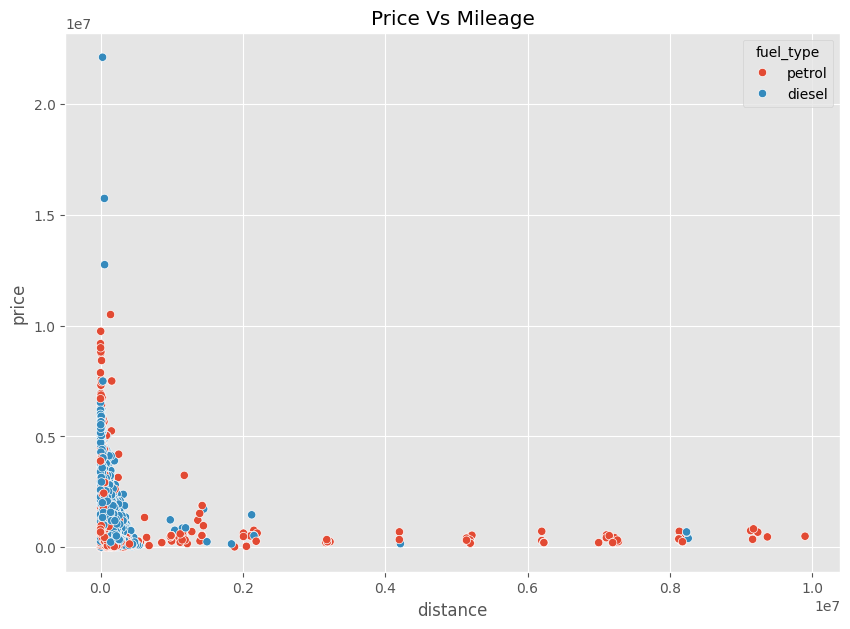

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='price', x='distance', hue='fuel_type', data=modified_data_train)

Price vs Seat:

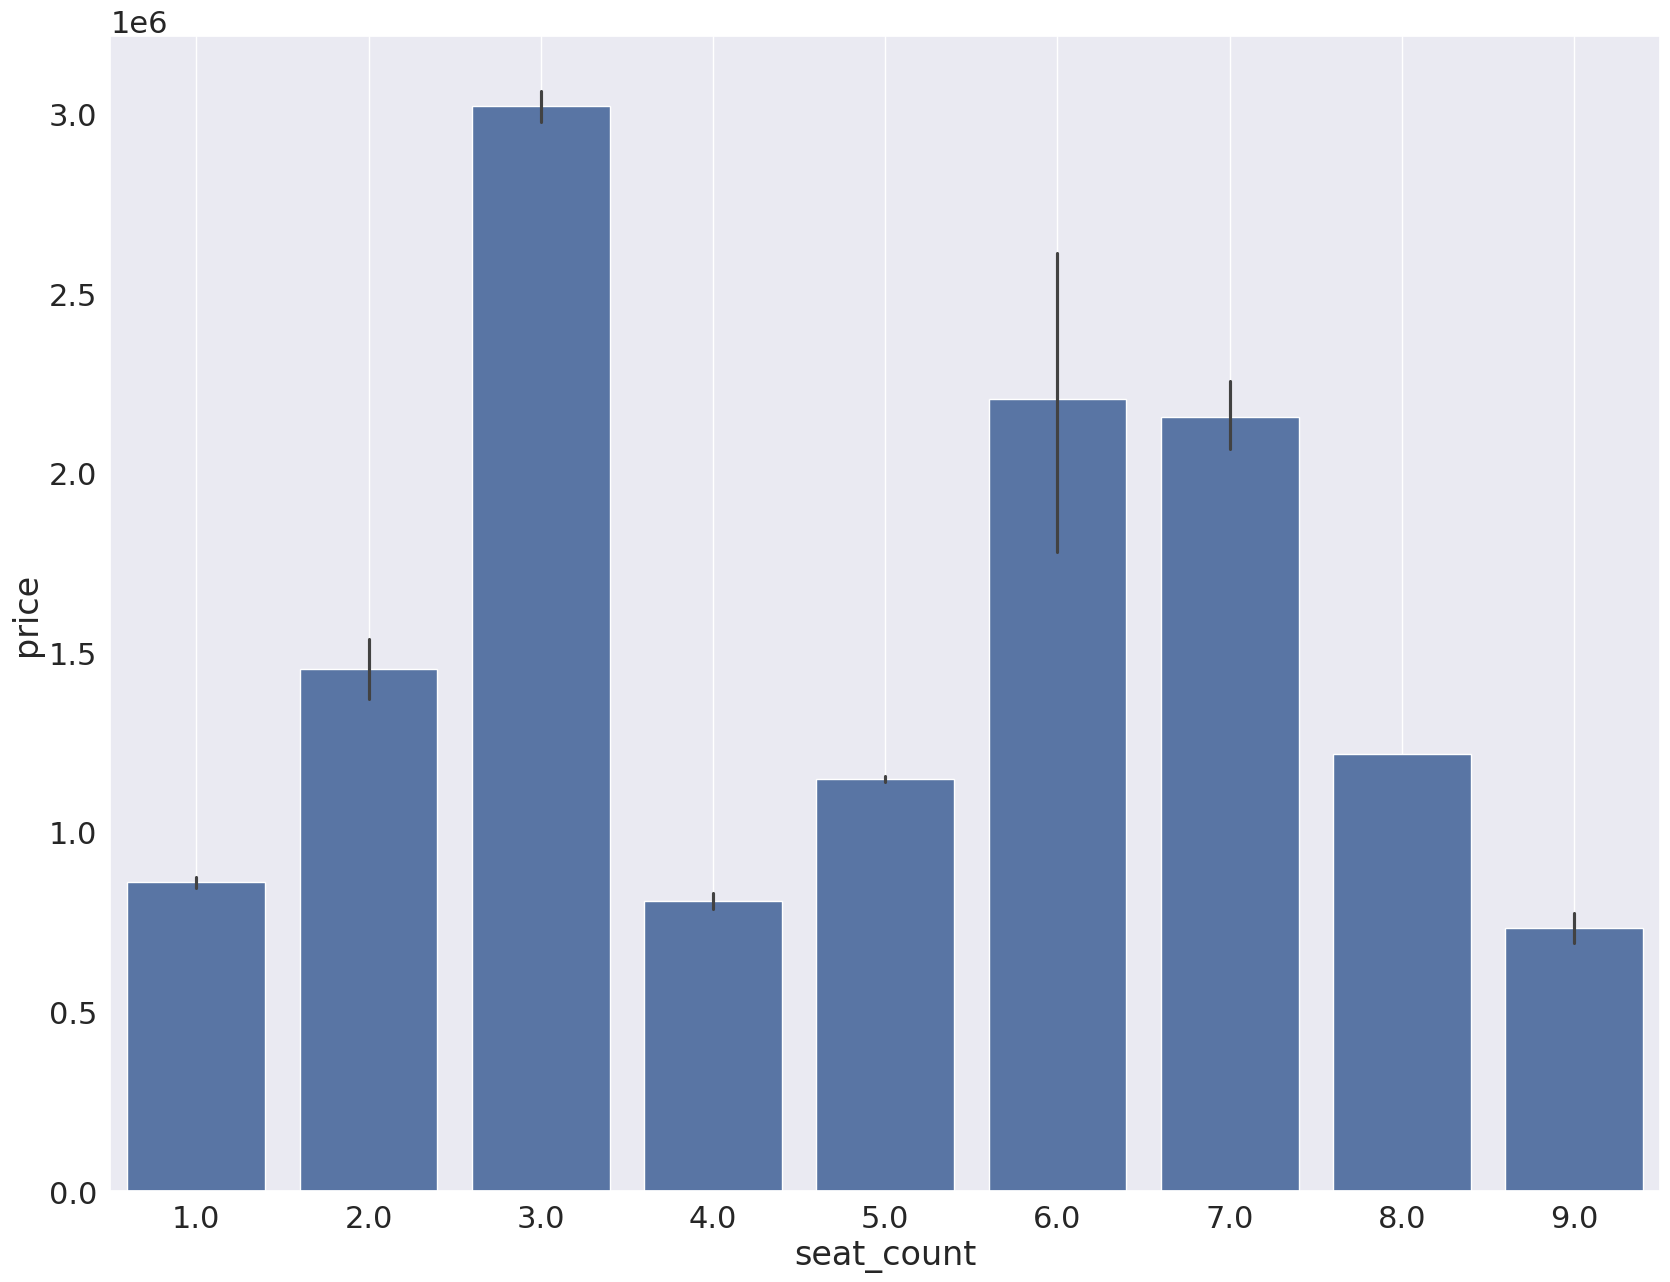

In [ ]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='seat_count', y='price', data=modified_data_train)
plt.grid()

Location vs Price:

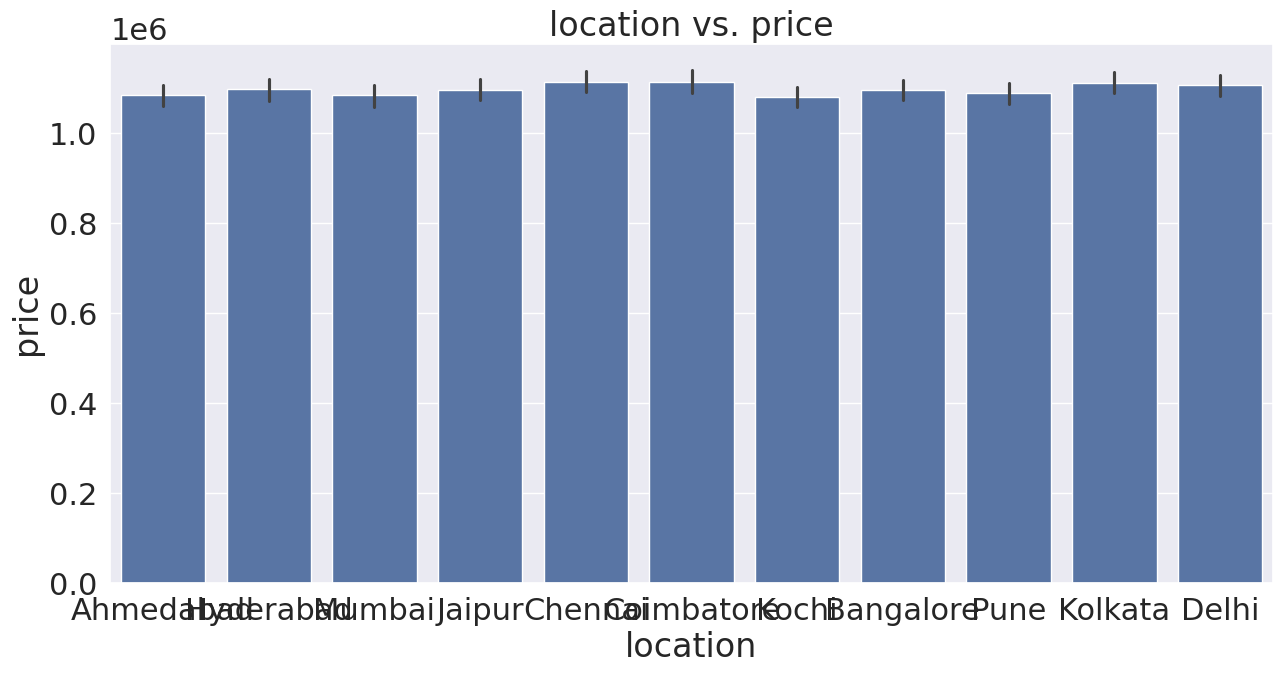

In [ ]:
categorical_plots(modified_data_train, 'location', 'price', hue = 'location', kind='bar', size=(15,7))

The price of the car is higher in Chennai, Coimbatore, Kolkata and Delhi.

Brand vs Price:

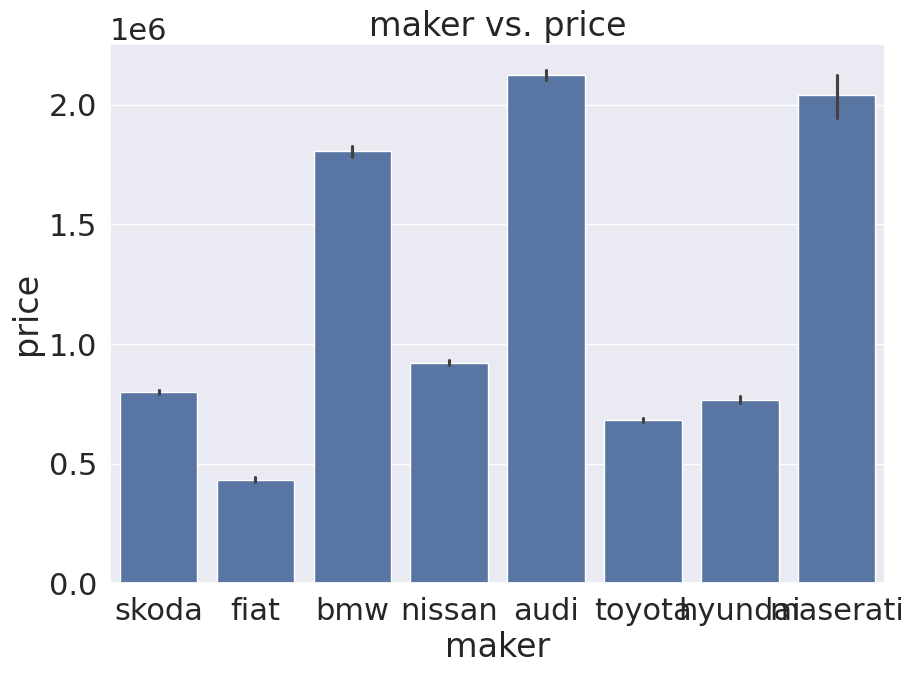

In [ ]:
categorical_plots(modified_data_train, 'maker', 'price', hue = 'maker', kind='bar', size=(10,7))

The price of Audi is higher, second is Miaserati followed by BMW. Fiat has the lowest price among all.

Age of car vs Price:

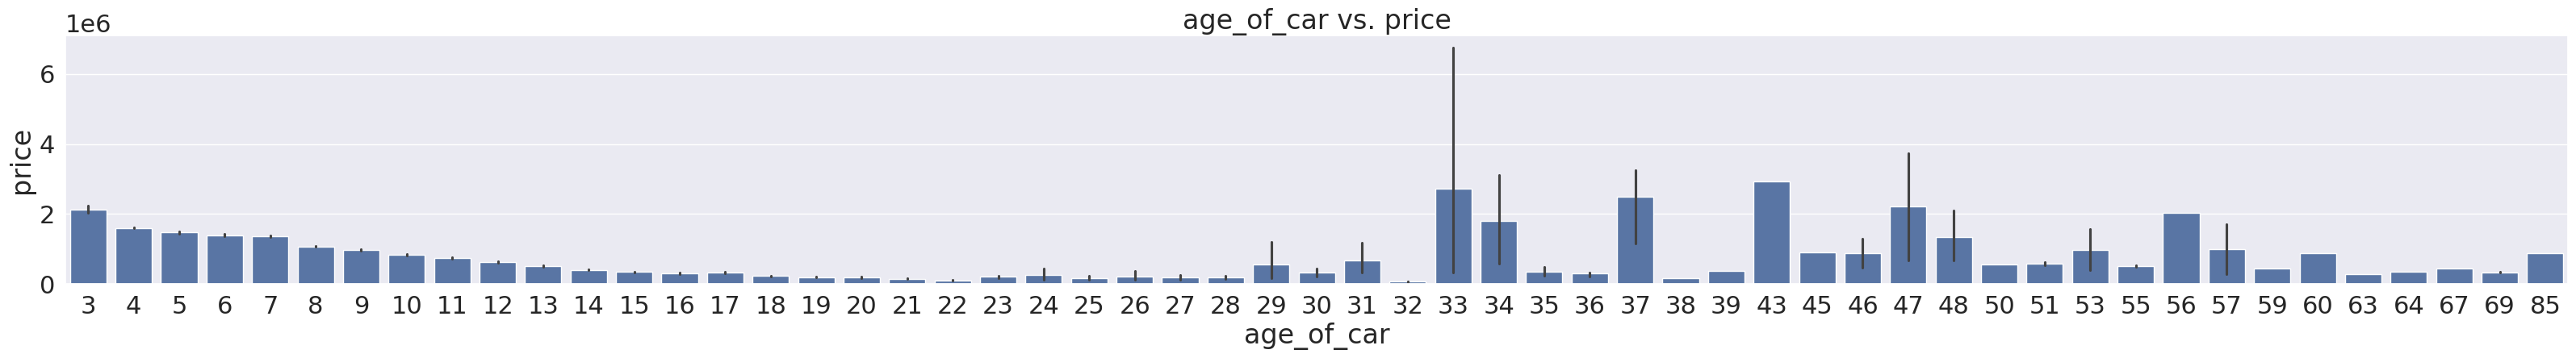

In [ ]:
categorical_plots(modified_data_train, 'age_of_car', 'price', hue = 'age_of_car', kind='bar',size=(40,4))

1. You may see some variations in price within specific age ranges. These variations can be attributed to factors like the car's make, model, condition, mileage, and features.
2. The graph likely illustrates a negative correlation between the age of a car and its price. This is a common trend in the used car market, where newer cars generally command higher prices than older cars due to factors like depreciation, wear and tear, and newer technologies in newer models.

Log transform and skewed column:

In [ ]:
def check_log_transformability(mofified_data_train, cols):
    '''
    Signature:
    check_log_transformability(modified_data_train, cols): validates if the columns are log transformable

    parameters:
    modified_data_train = pandas dataframe
    cols = list of columns to be performed log transformation on
    '''
    for colname in cols:
        plt.hist(modified_data_train[colname], bins=50)
        plt.title(colname + ' Distribution')
        plt.show()
        print(colname + ' data less or equal to zero in ' + str(np.sum(modified_data_train[colname] <= 0)) + ' rows')
        print('Skewness:  {}'.format(modified_data_train[colname].skew()))
        print('Kurtosis:  {}'.format(modified_data_train[colname].kurt()))

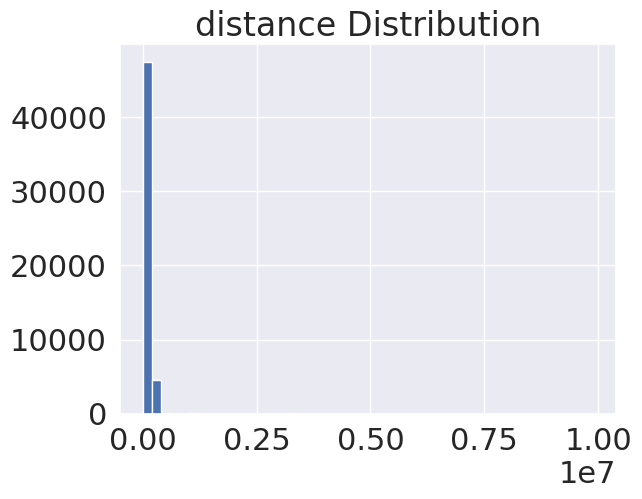

distance data less or equal to zero in 653 rows
Skewness:  23.336008239396925
Kurtosis:  632.9987196482938


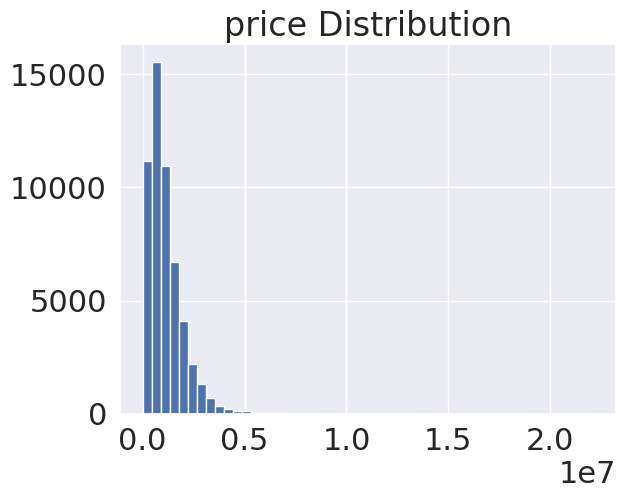

price data less or equal to zero in 0 rows
Skewness:  2.179996513287749
Kurtosis:  14.845862494473211


In [ ]:
check_log_transformability(modified_data_train, ['distance', 'price'])

The distance distribution is highly positively skewed. Most of the values are concentrated towards the lower end but htere are some high values which are pulling the tail to the right.
Kurtosis is 632.9987is extremely high and it indicates an extreme leptokurtic. There are many values clustered around the mean but there's also a high probability of extreme values like outliers far from the mean.

In 'Price Distribution' graph the skewness of 2.17 indicates a highly positive skew. This meansthe distribution of the data is nnot symmetrical and has more data clustered towards the lower values but some high values are pulling the distribution towards the right. Kurtosis of 14.85 signifies a very high kurtosis which is leptokurtic distribution. There are high concentration of data points around the mean(average) but there are also a higher probability of extreme values (outliers) far from the mean.

In [ ]:
def log_transform(modified_data_train, cols):
    for colname in cols:
        modified_data_train[colname + '_log'] = np.log(modified_data_train[colname])
        sns.histplot(data=modified_data_train, x=colname + '_log', bins=50, kde=True, color='green')
        plt.title(colname + ' Distribution')
        plt.show()

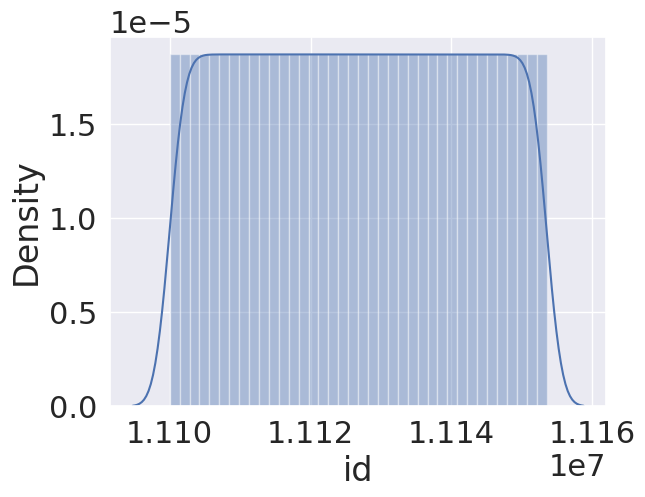

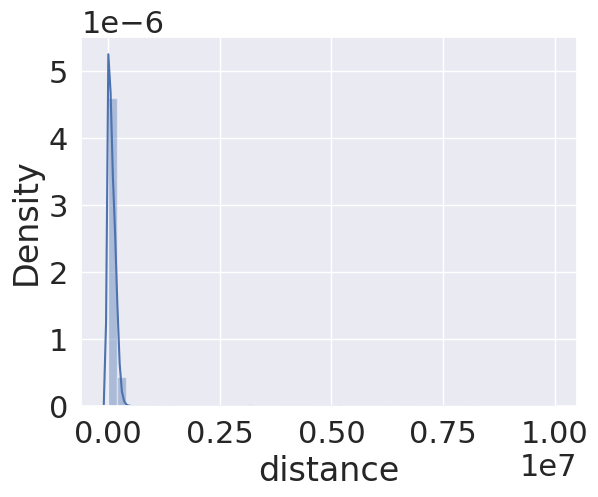

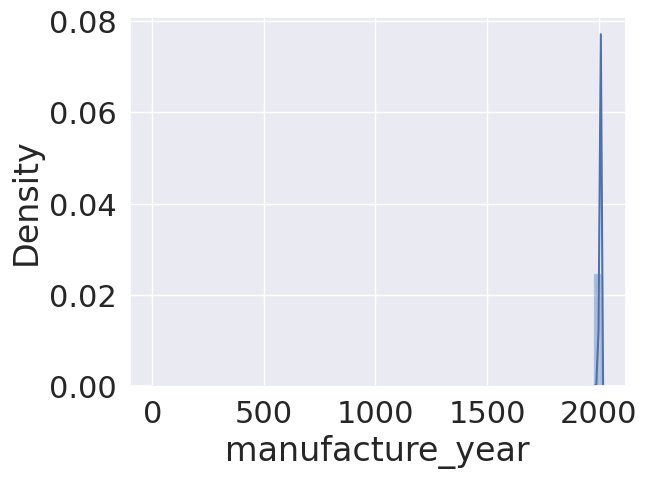

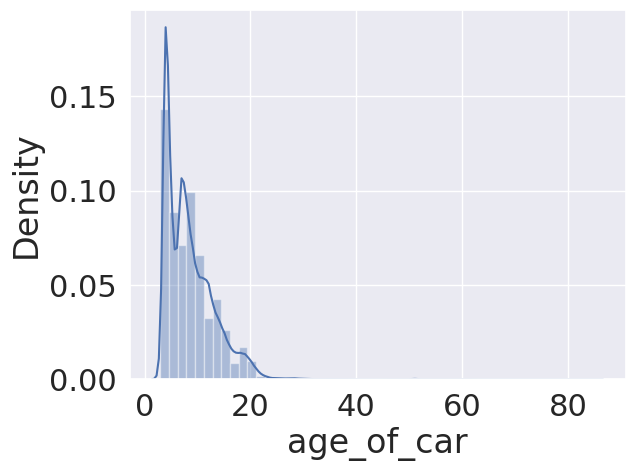

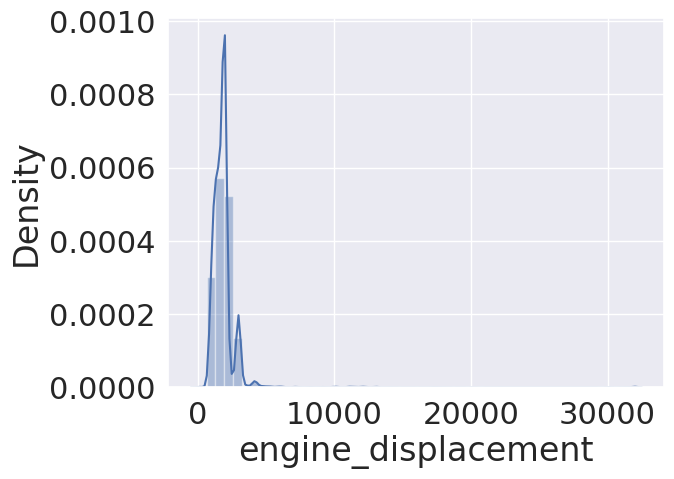

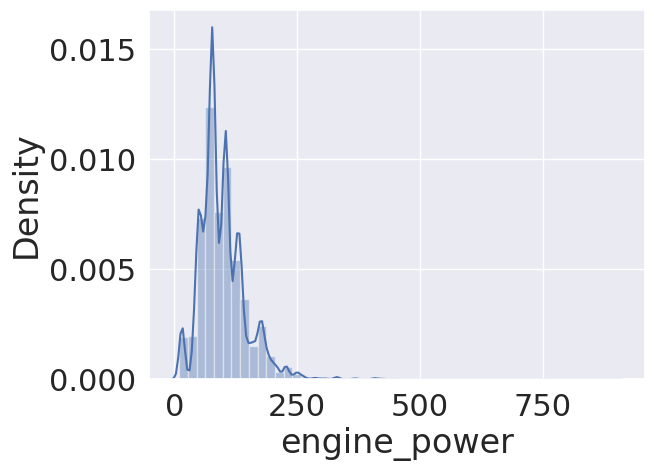

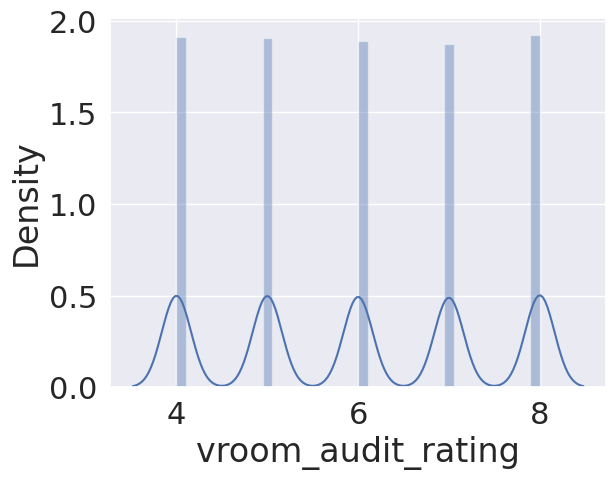

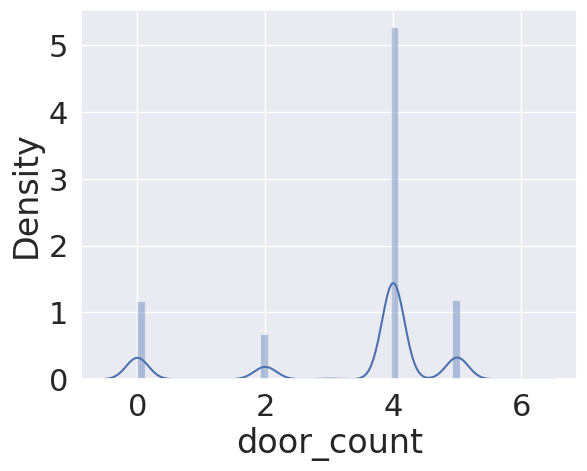

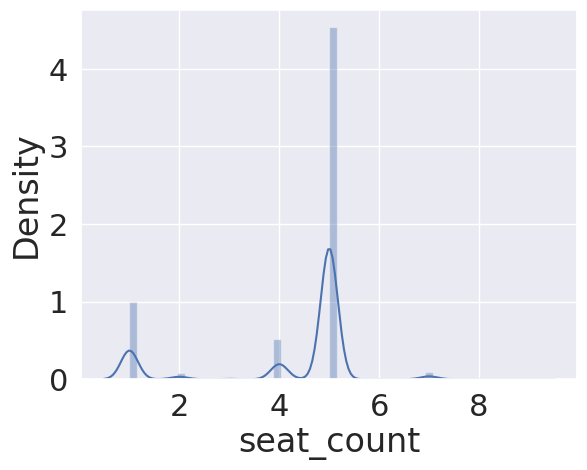

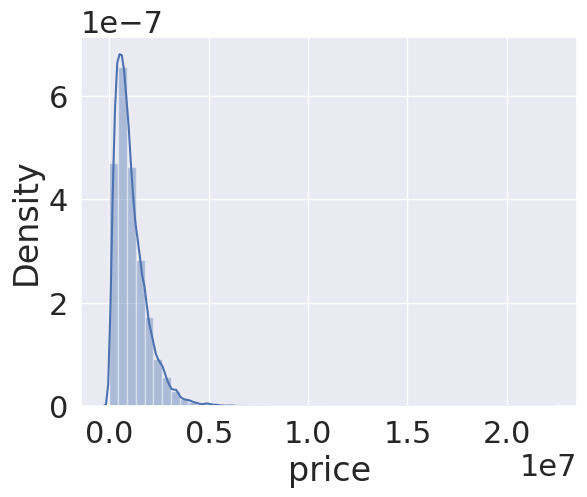

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your previous code) ...

cols_to_log = modified_data_train.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    # Replace infinite values with NaN
    modified_data_train[colname] = modified_data_train[colname].replace([np.inf, -np.inf], np.nan)

    # Drop rows with NaN values in the current column
    data_to_plot = modified_data_train[colname].dropna()

    sns.distplot(data_to_plot, kde=True)
    plt.show()

In [ ]:
modified_data_train.sample()

id maker location  distance owner_type  manufacture_year  \
7170  11107171  audi   Mumbai   88000.0      Third            2012.0   

      age_of_car  engine_displacement  engine_power body_type  \
7170           7                 1798         118.0       0.0   

      vroom_audit_rating transmission  door_count  seat_count fuel_type  \
7170                   6          man         2.0         4.0    petrol   

           price brand  
7170  1558212.75  AUDI

Build Model:

In [ ]:
print(modified_data_train.columns)
columns_to_drop = ['manufacture_year', 'maker', 'model']
existing_columns = [col for col in columns_to_drop if col in modified_data_train.columns]

modified_data_train.drop(existing_columns, axis=1, inplace=True, errors='ignore')


Index(['id', 'maker', 'location', 'distance', 'owner_type', 'manufacture_year',
       'age_of_car', 'engine_displacement', 'engine_power', 'body_type',
       'vroom_audit_rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'price', 'brand'],
      dtype='object')


In [ ]:
X = modified_data_train.drop(['price'], axis=1)
y = modified_data_train[['price']]

In [ ]:
modified_data_train.sample()

id location  distance owner_type  age_of_car  \
45404  11145405     Pune  105600.0      Third           9   

       engine_displacement  engine_power body_type  vroom_audit_rating  \
45404                 1968         125.0       0.0                   6   

      transmission  door_count  seat_count fuel_type       price  brand  
45404         auto         5.0         5.0    diesel  1104734.25  SKODA

Encode categorical variables:

In [ ]:
def encode_cat_vars(modified_data_train, cols):
    '''
    Signature: encode_cat_vars(modified_data_train, cols): encodes categorical variables in a dataframe

    Parameters:
    modified_data_train = a pandas dataframe
    cols = columns to encode
    '''

    modified_data_train = pd.get_dummies(
        modified_data_train,
        columns=cols,
        drop_first=True,
    )
    return modified_data_train

In [ ]:
modified_data_train_encoded = encode_cat_vars(modified_data_train, ['location', 'fuel_type', 'transmission'])

In [ ]:
X = modified_data_train_encoded
X.head()

id  distance      owner_type  age_of_car  engine_displacement  \
0  11100001       NaN          Second          55                 1964   
1  11100002   27750.0           Third           7                 1242   
2  11100003   46000.0           Third           5                 1995   
3  11100004   43949.0           Third           8                 1618   
4  11100005   59524.0  Fourth & Above           7                 2993   

   engine_power body_type  vroom_audit_rating  door_count  seat_count  ...  \
0         147.0   compact                   8         0.0         1.0  ...   
1          51.0       0.0                   6         4.0         4.0  ...   
2         105.0       0.0                   7         4.0         5.0  ...   
3         140.0       0.0                   7         4.0         5.0  ...   
4         180.0       0.0                   7         4.0         5.0  ...   

   location_Coimbatore location_Delhi  location_Hyderabad  location_Jaipur  \
0                False          False               False            False   
1                False          False               False            False   
2                False          False                True            False   
3                False          False               False            False   
4                False          False               False             True   

   location_Kochi  location_Kolkata  location_Mumbai  location_Pune  \
0           False             False            False          False   
1           False             False            False          False   
2           False             False            False          False   
3           False             False             True          False   
4           False             False            False          False   

   fuel_type_petrol  transmission_man  
0              True              True  
1              True              True  
2             False             False  
3              True              True  
4             False             False  

[5 rows x 24 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (37460, 24)
X_test: (16055, 24)
y_train: (37460, 1)
y_test: (16055, 1)


In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train['price'], train)
    return olsmodel.fit()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# ... (Your previous code, including the encode_cat_vars function) ...

# 1. Ensure all columns in X are numeric:
X = modified_data_train_encoded.select_dtypes(include=np.number)

# 2. Replace infinite values with NaN:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3. Drop rows with NaN values:
X.dropna(inplace=True)

#Update y accordingly to dropped rows
y = y.loc[X.index]


# 4. Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Add a constant term to the independent variables:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# 6. Define the model building function:
def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train['price'], train)
    return olsmodel.fit()

# 7. Create and fit the model:
olsmodel = build_ols_model(X_train)  # Pass X_train to the function

# 8. Print the model summary:
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.381e+32
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:19:46   Log-Likelihood:             6.6078e+05
No. Observations:               36612   AIC:                        -1.322e+06
Df Residuals:                   36602   BIC:                        -1.321e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.774e-08   1

Observation:



* The F-statistic is 2.381e+32 is extremely large. This indicates that there is very strong evidence to reject the null hypothesis that all the coefficients of the independent variables are equal to zero. In other words, the model is statistically significant, meaning that at least one of the independent variables is significantly related to the dependent variable.
* R-squared is 1.000 means that the model perfectly explains all the variations in the dependent variable. And Adjusted R-square is 1.000 suggestes that the model is a perfect fit.



In [ ]:
!pip install scikit-learn  # Install scikit-learn if not already installed
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error

import numpy as np

# Define MAPE function
def mape(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    # Clip the predicted values to prevent overflow
    y_pred_train_pricelog = np.clip(y_pred_train_pricelog, -700, 700)  # Adjust limits if necessary
    y_pred_train_Price = np.exp(y_pred_train_pricelog)
    y_train_Price = y_train["price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    # Clip the predicted values to prevent overflow
    y_pred_test_pricelog = np.clip(y_pred_test_pricelog, -700, 700)  # Adjust limits if necessary
    y_pred_test_Price = np.exp(y_pred_test_pricelog)
    y_test_Price = y_test["price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    # Calculate RMSE using mean_squared_error
                    np.sqrt(mean_squared_error(y_train_Price, y_pred_train_Price)),
                    np.sqrt(mean_squared_error(y_test_Price, y_pred_test_Price)),
                ],
                "MAE": [
                    mean_absolute_error(y_train_Price, y_pred_train_Price), # Use mean_absolute_error from scikit-learn
                    mean_absolute_error(y_test_Price, y_pred_test_Price), # Use mean_absolute_error from scikit-learn
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price), # Call the defined mape function
                    mape(y_pred_test_Price, y_test_Price), # Call the defined mape function
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel, X_train, X_test)

    Data  RMSE            MAE           MAPE
0  Train   inf            inf  1.815713e+300
1   Test   inf  1.014038e+304  1.745977e+300


Observation:


*   The RMSE is infinite that means the model predictions consists of lot of errors.
*   An infinite MAE means that the Train model has an extremely large errors in its predictions. While the Test model is 1.014038e+304 indicates a severe problem with with the test model.
* The MAPE is 1.8157.



Test Assuption:

Checking the Linear Regression Assumptions:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [ ]:
print(checking_vif(X_train))

               feature            VIF
0                const  519833.762201
1                   id       1.000058
2             distance       1.084168
3           age_of_car       1.695015
4  engine_displacement       1.199599
5         engine_power       2.069351
6   vroom_audit_rating       1.000163
7           door_count       1.567443
8           seat_count       1.484622
9                price       2.650571


In [ ]:
X_train1=X_train.drop(['engine_displacement'],axis=1)
X_test1=X_test.drop(['engine_displacement'],axis=1)
olsmodel2= build_ols_model(X_train1)

print(olsmodel2.summary())

# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.309e+33
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:19:49   Log-Likelihood:             7.0680e+05
No. Observations:               36612   AIC:                        -1.414e+06
Df Residuals:                   36603   BIC:                        -1.414e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.611e-08   3.77

In [ ]:
print(checking_vif(X_train1))

              feature            VIF
0               const  519822.277291
1                  id       1.000047
2            distance       1.075222
3          age_of_car       1.675041
4        engine_power       1.971480
5  vroom_audit_rating       1.000134
6          door_count       1.548525
7          seat_count       1.481842
8               price       2.630758


Mean of residula should be 0:

In [ ]:
residuals = olsmodel2.resid
np.mean(residuals)

-5.65938693992657e-11

The mean residuals is very close to 0 which is good as the model's predictions is good and it also implies that the model is not overestimating or underestimating the target variable.

No Heteroscedacity:

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train1)
lzip(name, test)

[('F statistic', 1.0278741231925428), ('p-value', 0.031487680697903725)]

p-value is 0.0314 which is less than 0.05, it means that there'e real effect or relationship between the variables you're testing.

Linearity of variables:

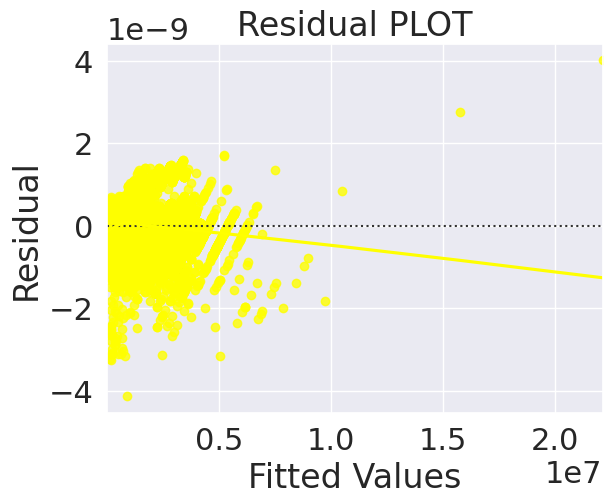

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train1)
lzip(name, test)

# Define 'fitted' values (predicted values from the model)
fitted = olsmodel2.predict(X_train1) # Assuming olsmodel2 is your fitted model

resid_df = pd.DataFrame({'Fitted': fitted, 'Residuals': residuals})

# Use the 'data' parameter to specify the DataFrame
# and 'x' and 'y' to map the columns to the plot axes
sns.residplot(data=resid_df, x='Fitted', y='Residuals', color="yellow", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

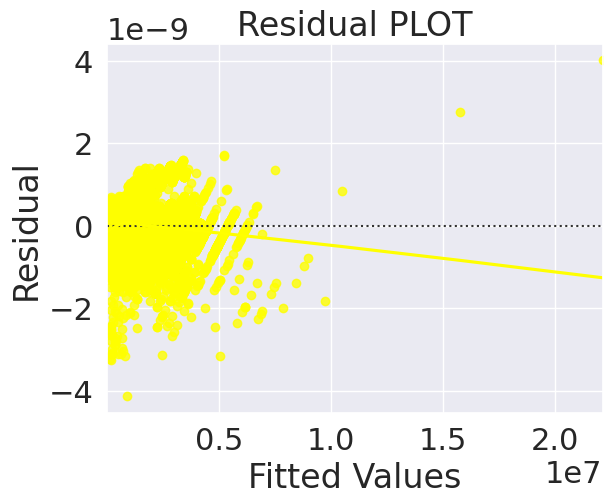

In [ ]:
resid_df = pd.DataFrame({'Fitted': fitted, 'Residuals': residuals})

# Use the 'data' parameter to specify the DataFrame
# and 'x' and 'y' to map the columns to the plot axes
sns.residplot(data=resid_df, x='Fitted', y='Residuals', color="yellow", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Observation:

* The lower smoother is not horizontal to 0, the linearity assumption is not met.
* The model has homoscedasticity.
* The model is also heteroscedasticity.
* The model aso contains some potential outliers.

Normality of error terms:

<Axes: ylabel='Density'>

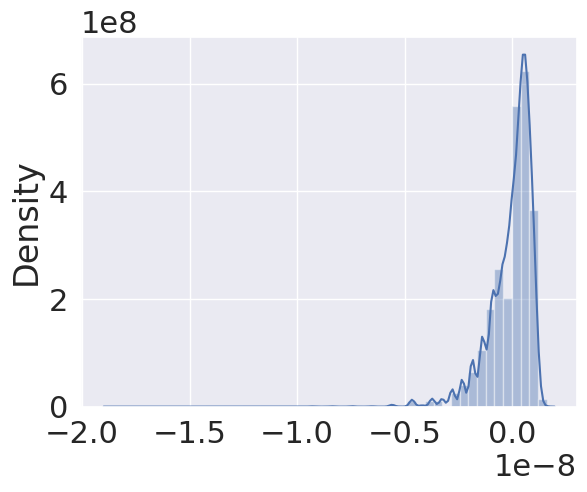

In [ ]:
sns.distplot(residuals)

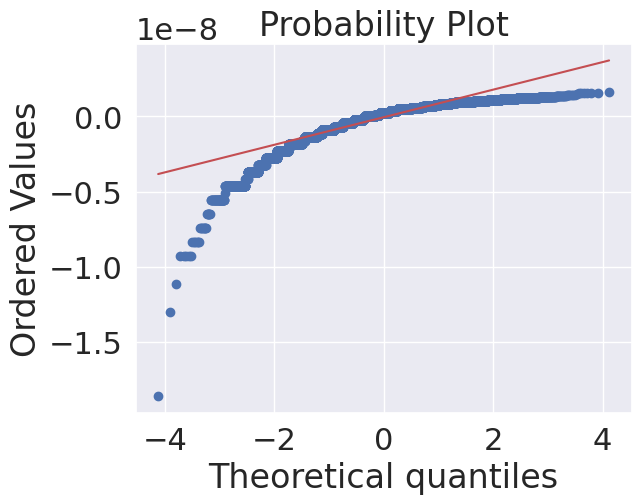

In [ ]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

Here we can see that there is a curve in the plot and it indicates the fact that either the data is not normally distributed or else it is skewed

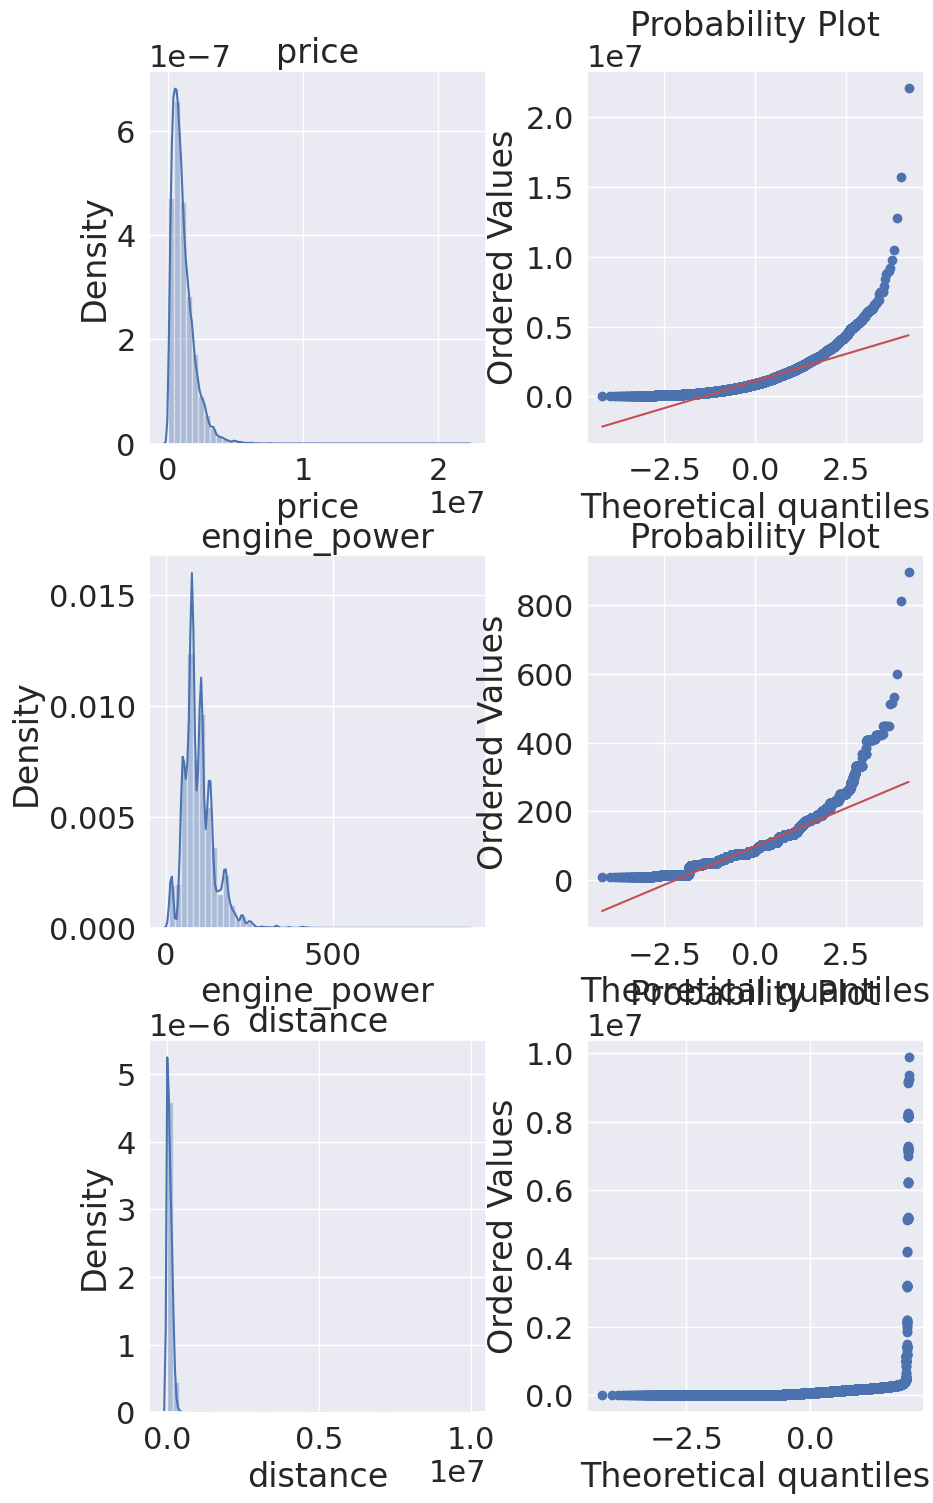

In [ ]:
fig = plt.figure(figsize=[10,30]);
grid = plt.GridSpec(5, 2, wspace=0.3, hspace=0.3)
x = ['price', 'engine_power','distance']

# Replace 'residuals' with 'modified_data_train' to access original columns
for i, a in enumerate(x):
    exec(f'ax{i}0 = plt.subplot(grid[i,0]);')
    # Use modified_data_train[a] to access the column data
    exec(f'sns.distplot(modified_data_train[a], ax=ax{i}0);')
    exec(f'ax{i}0.set_title(a);')
    exec(f'ax{i}1 = plt.subplot(grid[i,1]);')
    # Assuming 'cars_data' is your original DataFrame
    exec(f'stats.probplot(modified_data_train[a],dist="norm",plot=pylab);')

fig.show()

There are few components with normal distribution.

In [ ]:
print(olsmodel2.summary())
# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.309e+33
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:38:15   Log-Likelihood:             7.0680e+05
No. Observations:               36612   AIC:                        -1.414e+06
Df Residuals:                   36603   BIC:                        -1.414e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.611e-08   3.77

Observation:

* The F-statistic is 3.309e+33 which is extremely large. It is indicating that the model is statistically significant.
* R-squared is 1 explains that the model is perfectly explaining all the variability in the car prices as in 100% variations is accounted.
* Adjusted R-square is 1 which explains all the variables of the car price.